# Correlations between datasets

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D      

#### Import all data
ms_data = dataframe with normalised intensites : samples x molecules

using first replicate

In [124]:
# ms data
data = pd.read_csv('data/cas_intensities.csv', delimiter=',', index_col = 0)
# only use first repliate
data = data[data["replicate"]==1]
ms_data = data.drop(columns=["replicate"])

In [125]:
data_dist = ms_data.copy()
data_dist["sum"] = data_dist.apply(lambda row:row.sum(), axis=1)
data_dist['median']= data_dist.apply(lambda row:row[:-1].median(), axis=1)
data_dist['mean']= data_dist.apply(lambda row:row[:-2].mean(), axis=1)
data_norm = data_dist.apply(lambda row: row[:-3]/row['mean'],axis=1)
data_norm.index = data_dist.index
data_norm2 = data_norm.apply(lambda col:col/col.median(),axis=0)

In [126]:
data_dist

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3,sum,median,mean
sample_key,,,,,,,,,,,,,,,,,,,,,
000920,1.943542e+08,1.240854e+09,1.048295e+08,9.087319e+07,1.831223e+08,1.831223e+08,6.043091e+08,1.943542e+08,1.943542e+08,1.240854e+09,...,4.645706e+08,4.645706e+08,1.893777e+08,1.831223e+08,1.831223e+08,2.528854e+08,2.662124e+08,1.885973e+11,1.716748e+08,2.576465e+08
000922,1.549112e+08,1.029110e+09,1.086362e+08,1.181268e+08,1.913892e+08,1.913892e+08,6.519549e+08,1.549112e+08,1.549112e+08,1.029110e+09,...,4.505443e+08,4.505443e+08,2.602672e+08,1.913892e+08,1.913892e+08,1.875943e+08,2.698756e+08,1.901274e+11,1.875943e+08,2.597369e+08
000927,1.688820e+08,1.102763e+09,1.523761e+08,1.616408e+08,1.932470e+08,1.932470e+08,7.387225e+08,1.688820e+08,1.688820e+08,1.102763e+09,...,4.690569e+08,4.690569e+08,2.387369e+08,1.932470e+08,1.932470e+08,2.299686e+08,2.549133e+08,2.038954e+11,1.775292e+08,2.785456e+08
000911,1.759171e+08,9.992782e+08,1.654314e+08,1.787409e+08,2.531031e+08,2.531031e+08,8.800410e+08,1.759171e+08,1.759171e+08,9.992782e+08,...,4.831389e+08,4.831389e+08,3.724425e+08,2.531031e+08,2.531031e+08,2.857401e+08,3.321024e+08,2.279643e+11,2.247833e+08,3.114267e+08
000925,1.517116e+08,1.068380e+09,1.090820e+08,1.262307e+08,1.855528e+08,1.855528e+08,6.077461e+08,1.517116e+08,1.517116e+08,1.068380e+09,...,4.520255e+08,4.520255e+08,2.344530e+08,1.855528e+08,1.855528e+08,1.823817e+08,2.454637e+08,1.825964e+11,1.552483e+08,2.494486e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000596,2.413772e+08,2.413874e+09,9.689814e+07,9.213682e+07,1.471158e+08,1.471158e+08,6.822826e+08,2.413772e+08,2.413772e+08,2.413874e+09,...,5.506742e+08,5.506742e+08,1.736489e+08,1.471158e+08,1.471158e+08,2.592504e+08,3.138085e+08,2.626522e+11,1.849320e+08,3.588144e+08
000804,3.452753e+08,3.397598e+09,1.905095e+08,2.577871e+08,2.881055e+08,2.881055e+08,1.122339e+09,3.452753e+08,3.452753e+08,3.397598e+09,...,5.763415e+08,5.763415e+08,3.355894e+08,2.881055e+08,2.881055e+08,3.308782e+08,5.460406e+08,4.142515e+11,3.308782e+08,5.659174e+08
000853,3.740657e+08,1.855998e+09,1.829394e+08,1.613276e+08,2.186666e+08,2.186666e+08,6.303671e+08,3.740657e+08,3.740657e+08,1.855998e+09,...,2.239344e+08,2.239344e+08,1.979400e+08,2.186666e+08,2.186666e+08,3.798451e+08,3.843281e+08,2.783030e+11,2.430886e+08,3.801953e+08


In [127]:
ms_data = data_norm2

In [128]:
ms_data.iloc[0:5,0:5]

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4
sample_key,,,,,
000920,1.158771,0.895271,0.946861,0.819830,1.523904
000922,0.916172,0.736523,0.973346,1.057127,1.579881
000927,0.931354,0.735943,1.273055,1.348861,1.487501
000911,0.867721,0.596470,1.236200,1.334076,1.742538
000925,0.934255,0.796164,1.017651,1.176241,1.594876


panelist_data_df = dataframe with panelist data : samples x flavors

using values from 1. panelist

In [129]:
panelist_data_df = pd.read_table("data/vlb_data_combined.txt", delimiter=',', index_col = 1)
panelist_data_df = panelist_data_df[panelist_data_df["panelist"]==1]
panelist_data_df = panelist_data_df.drop(columns=["panelist", "date"])

In [130]:
panelist_data_df.iloc[0:5]

,Floral,Fruity,Woody,Complexity,Malt,Sweet,Peaty,Dried_fruits,Aftertaste
samplekey,,,,,,,,,
000656,50,20,60,50,30,30,50,40,40
000657,30,40,60,40,40,30,10,30,60
000658,30,50,50,50,40,40,10,40,70
000661,60,70,60,50,50,60,0,40,60
000662,40,60,50,50,50,40,0,30,60


show distribution of each flavor in the panelist data

In [131]:
flavors = ['Floral','Fruity','Woody','Complexity','Malt','Sweet','Peaty','Dried_fruits','Aftertaste']

##### distribution of flavor in panelist data

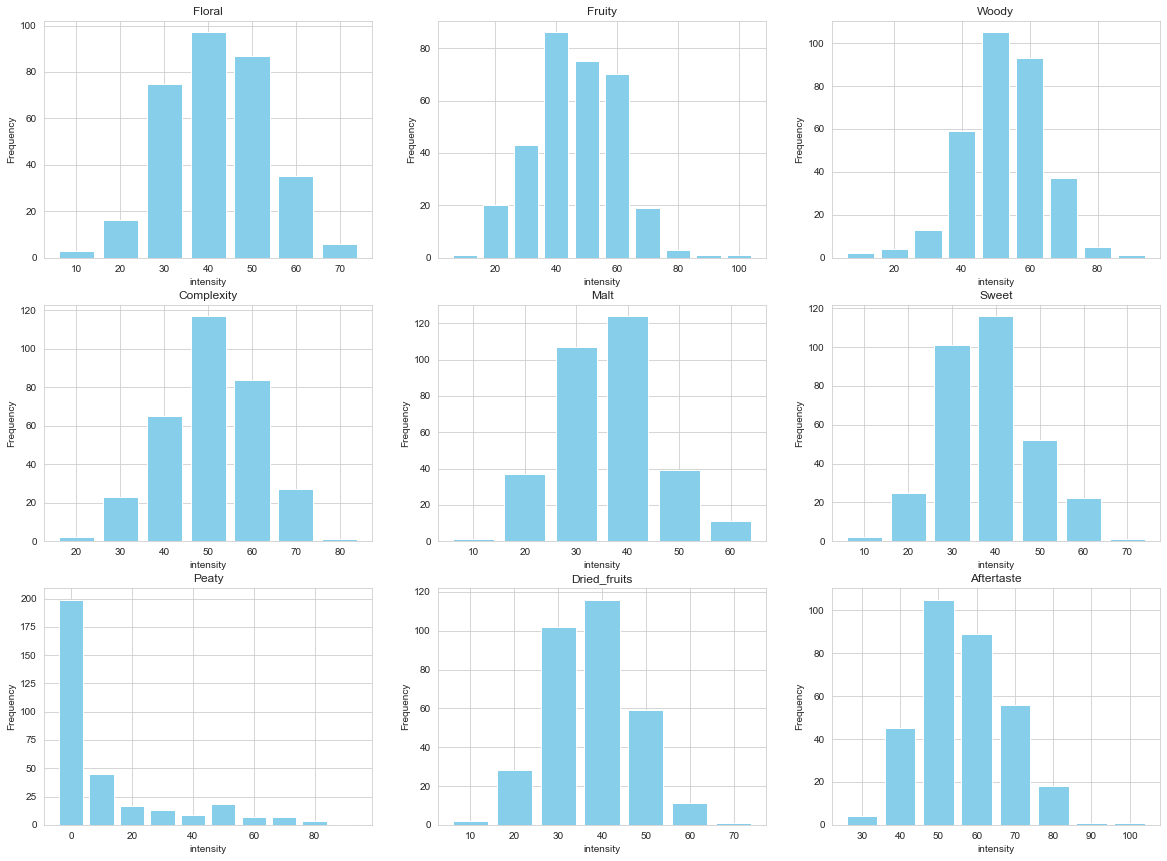

In [132]:
plt.figure(figsize=(20,20))
i = 0
for flavor in flavors:
    i+=1
    counts = panelist_data_df[flavor].value_counts()

    plt.subplot(4,3,i)
    plt.bar(counts.index, counts.values, color='skyblue',width=8)
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    plt.title(flavor)#
plt.show()


##### chatgpt data

In [571]:
chat_gpt_data = pd.read_csv("data/csv_WBS_CahtData_professional_HH.csv", delimiter=';')
chat_gpt_key = pd.read_csv("data/Sample_gesamtliste.csv", delimiter=';')


In [572]:
dict_chat_gpt = {key: value for key, value in zip(list(chat_gpt_key['Name']), np.nan_to_num(chat_gpt_key['Sample Key']).astype(int))}
chat_gpt_data.index = chat_gpt_data['Whisky Name'].replace(dict_chat_gpt)
chat_gpt_data.index.name = "sample key"
chat_gpt_data = chat_gpt_data[chat_gpt_data.index.map(lambda x: type(x) == np.int32)]
chat_gpt_data= chat_gpt_data.drop(columns="Whisky Name")
chat_gpt_data.columns= flavors
chat_gpt_data=chat_gpt_data*10
chat_gpt_data.index = chat_gpt_data.index.map(lambda x: '000'+str(x))

In [573]:
chat_gpt_data

,Floral,Fruity,Woody,Complexity,Malt,Sweet,Peaty,Dried_fruits,Aftertaste
sample key,,,,,,,,,
000354,0,70,60,70,0,70,0,70,60
000356,0,60,90,80,0,80,0,60,70
000357,0,0,80,70,0,0,60,0,80
000361,80,70,60,90,0,70,0,70,80
000362,0,80,70,80,0,80,0,60,70
...,...,...,...,...,...,...,...,...,...
000913,40,60,70,70,60,60,30,60,70
000925,70,80,60,80,40,50,0,50,70
000926,50,60,80,70,70,30,90,70,80


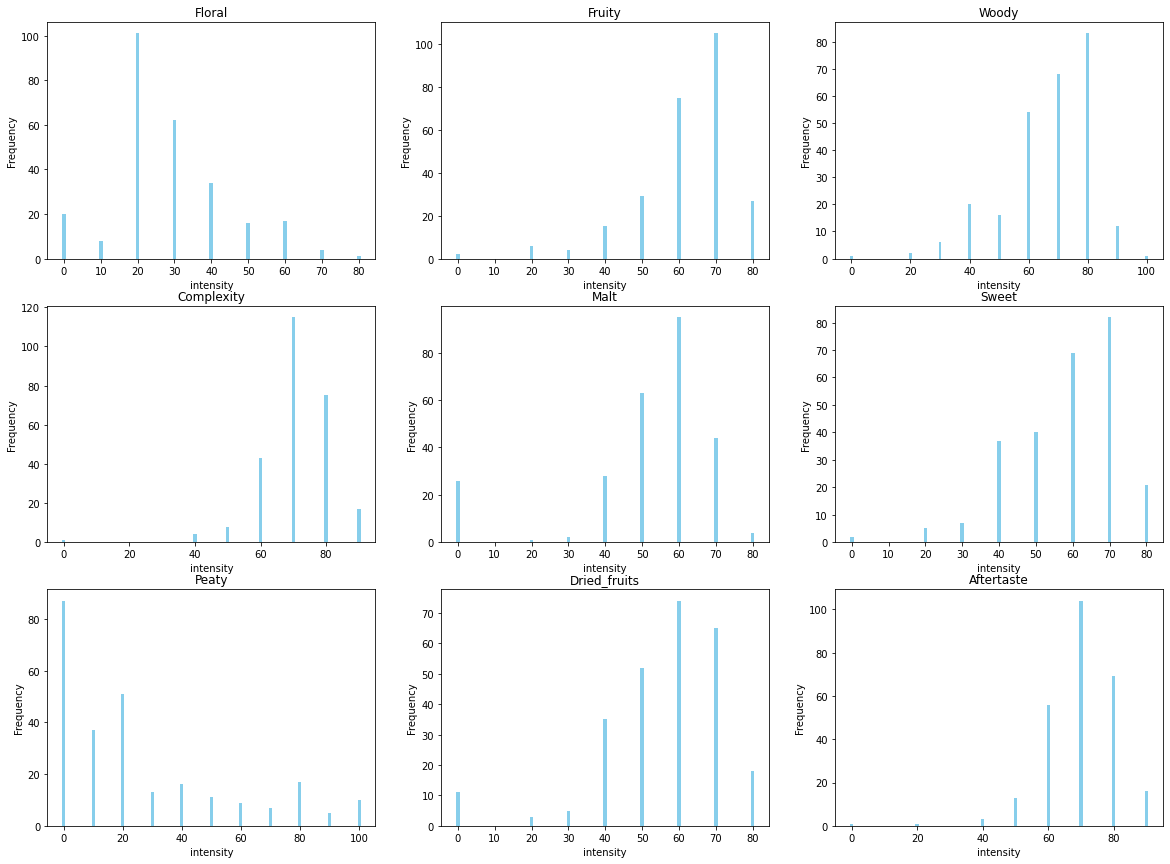

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
i = 0
for flavor in flavors:
    i+=1
    counts = chat_gpt_data[flavor].value_counts()

    plt.subplot(4,3,i)
    plt.bar(counts.index, counts.values, color='skyblue',width=1)
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    plt.title(flavor)
plt.show()


In [14]:

valid_indexes_all = [index for index in chat_gpt_data.index if index in valid_indexes]
valid_indexes_ms = [index for index in chat_gpt_data.index if index in ms_data.index]
valid_indexes_gpt = [index for index in chat_gpt_data.index if index in ms_data.index]


In [15]:
panelist_x_gpt_comp = panelist_data_df.loc[valid_indexes_all]

In [16]:
ms_data_gpt_comp = ms_data.loc[valid_indexes_ms]
chat_gpt_data_comp=chat_gpt_data.loc[valid_indexes_gpt]


chat_gpt_data_comp = df of chat gpt data containing only overlapp of samples with ms data


ms_data_gpt_comp = df of ms data containing only overlapp of samples with chat gpt data

In [18]:
chat_gpt_data_comp

,Floral,Fruity,Woody,Complexity,Malt,Sweet,Peaty,Dried_fruits,Aftertaste
sample key,,,,,,,,,
000354,0,70,60,70,0,70,0,70,60
000356,0,60,90,80,0,80,0,60,70
000357,0,0,80,70,0,0,60,0,80
000361,80,70,60,90,0,70,0,70,80
000362,0,80,70,80,0,80,0,60,70
...,...,...,...,...,...,...,...,...,...
000911,50,80,90,90,50,50,10,80,90
000912,30,60,70,70,60,60,70,60,70
000925,70,80,60,80,40,50,0,50,70


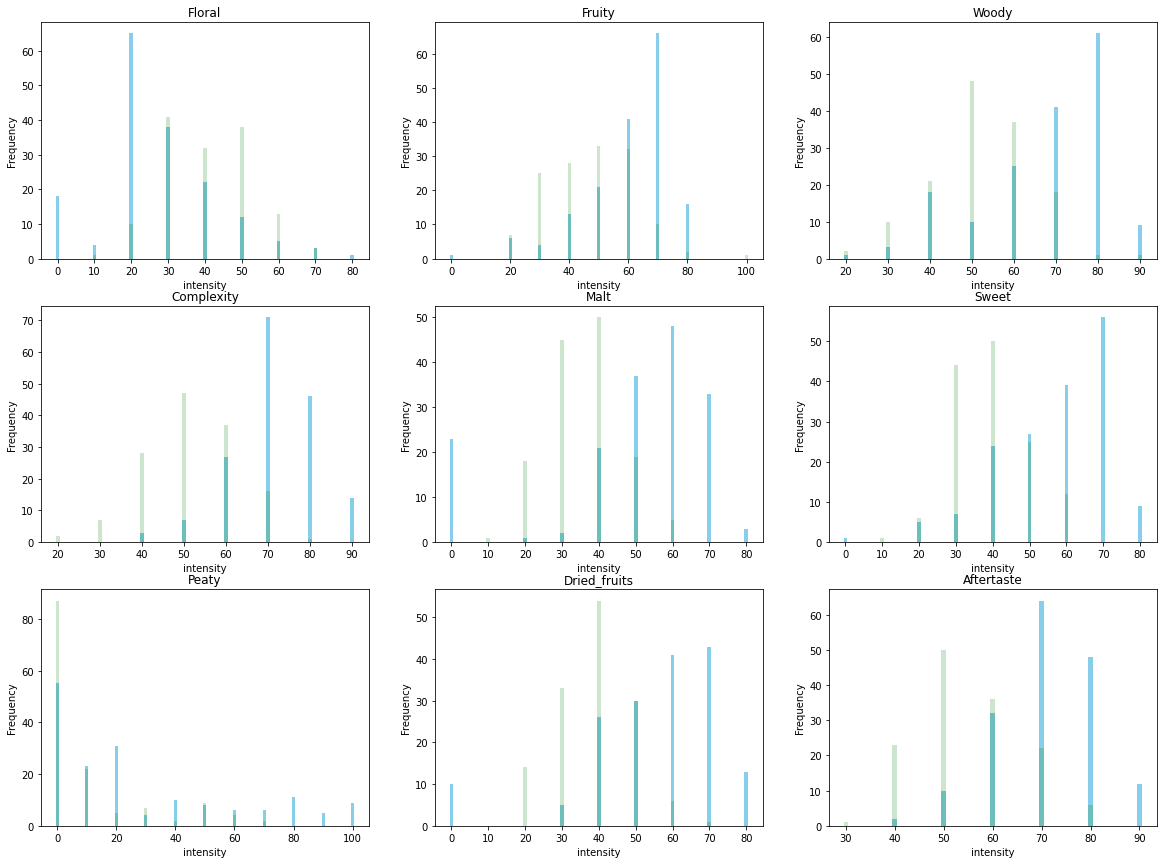

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
i = 0
for flavor in flavors:
    i+=1
    counts_1 = chat_gpt_data_comp[flavor].value_counts()
    counts_2 = panelist_x_gpt_comp[flavor].value_counts()

    plt.subplot(4,3,i)
    plt.bar(counts_1.index, counts_1.values, color='skyblue',width=1)
    plt.bar(counts_2.index, counts_2.values, color='green',width=1, alpha=0.2)
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    plt.title(flavor)
plt.show()


### 1. Correlation between one flavor and ms data

ms_data_comp = df of ms data containing only comparable samples


panelist_data_comp = df of panelist data containing only comparable samples

In [133]:
# get only comparable samplekeys
valid_indexes = [index for index in panelist_data_df.index if index in ms_data.index]
ms_data_comp = ms_data.loc[valid_indexes]
panelist_data_comp = panelist_data_df.loc[valid_indexes]

In [134]:
panelist_data_comp.iloc[0:5]

,Floral,Fruity,Woody,Complexity,Malt,Sweet,Peaty,Dried_fruits,Aftertaste
samplekey,,,,,,,,,
000656,50,20,60,50,30,30,50,40,40
000657,30,40,60,40,40,30,10,30,60
000658,30,50,50,50,40,40,10,40,70
000838,30,70,60,60,40,50,0,40,60
000839,50,60,60,60,40,50,0,30,70


In [135]:
ms_data_comp.iloc[0:5,0:5]

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4
sample_key,,,,,
000656,1.199706,1.096160,0.885081,0.725355,0.735938
000657,1.086004,1.259616,0.775672,0.689940,0.670537
000658,1.113889,0.971559,1.142589,1.112428,1.054808
000838,1.298360,0.862224,2.311178,1.935987,1.840937
000839,1.621833,1.188670,2.170095,1.563707,1.103434


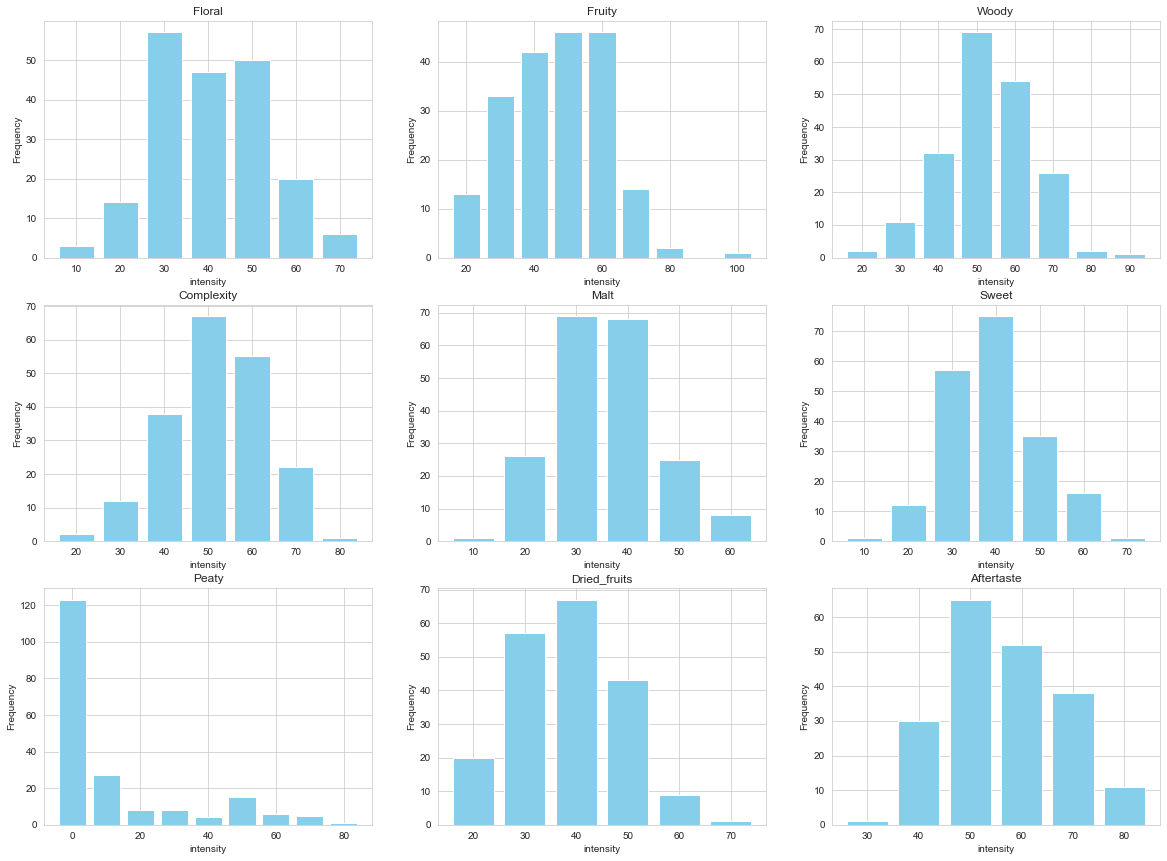

In [136]:
plt.figure(figsize=(20,20))
i = 0
for flavor in flavors:
    i+=1
    counts = panelist_data_comp[flavor].value_counts()

    plt.subplot(4,3,i)
    plt.bar(counts.index, counts.values, color='skyblue',width=8)
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    plt.title(flavor)#
plt.show()


#### Find all descriptors for each flavor: Sweet, Fruity, Woody, Malt

In [137]:
# find CAS number to each molecule
CAS_to_mol = pd.read_table("data/CAS_mol_OD.csv", delimiter=',',  names= ["CAS","intensity", "odor"])
CAS_to_mol=CAS_to_mol.drop(columns=["intensity","odor"])
CAS_to_mol= CAS_to_mol.drop_duplicates()
CAS_to_mol

,CAS
(-)-carvone,6485-40-1
(-)-cis-rose oxide,3033-23-6
(-)-cubenol,21284-22-0
(-)-nootkatone,38427-78-0
(-)-β-bisabolene,495-61-4
...,...
δ-dodecalactone,713-95-1
δ-elemene,20307-84-0
δ-muurolene,120021-96-7
δ-terpinene,586-62-9


sweet_descriptors =  all molecules that where labeled as sweet in flavornet

In [138]:
# all molecules that where labeled as sweet in flavornet
sweet_descriptors = ["benzyl alcohol","ethyl phenylacetate","tridecanal","nerol","methyl hexanoate","linalyl isovalerate","undecanaldehyde","caryophyllene oxide","linalyl acetate","safranal","uncineol","phenylethanal","p-anisaldehyde","eudesmol","ethylmethyl pyrazine","citronellyl butyrate","4-methyl-3-penten-2-one","nonyl acetate","10-epi-γ-eudesmol","β-bisabolol","(Z)-6-dodecene-γ-lactone","β-farnesene","2-dodecenal","γ-dodecalactone","epoxy-β-ionone","2-undecenal","styrene glycol","methyl furaneol","(-)-cis-rose oxide","(E)-β-ocimene","dimethylmethoxyfuranone","1,8-cineole","ethylbenzaldehyde","2-pentylthiophene","α-farnesene","methionol","7-methoxycoumarin","(Z)-3-hexenyl-2-methylbutanoate","o-aminoacetophenone","viridiflorol","isopiperitone","β-sinensal","ethyl vanillate","methyl butanoate","p-methoxystyrene","ethanol","6-Methoxyeugenol","4-hexanolide","δ-dodecalactone","sesquiphellandrene","diethyl malate","linalyl butyrate","guaiacol","coumarin","methyl benzoate","isopropyl benzoate","safrole","durene","γ-butyrolactone","ethyl isobutyrate","furfural"]
fruit_descriptors = ["ethyl phenylacetate", "geranyl valerate", "γ-heptalactone", "ethyl propionate", "diethyl acetal", "geranyl butyrate", "ethyl heptylate", "ethyl octanoate", "methyl hexanoate", "dimethylheptenal", "pentanone", "ethyl 3-methylbutanoate", "geranyl isovalerate", "isobutyl acetate", "ethoxypropanol", "methyl-2-butenal", "methylnonanedione", "linalyl acetate", "methyl geranate", "limonene oxide", "hydrocinnamic alcohol", "diethyl succinate", "ethyl hexanoate", "ethylmethyl pyrazine", "β-cubebene", "neryl acetate", "citronellyl butyrate", "hexyl acetate", "nonyl acetate", "butyl methylbutyrate", "pentenal", "isopentyldimethylpyrazine", "p-menth-1-en-9-ol", "hexadecanone", "octyl acetate", "γ-dodecalactone", "epoxy-β-ionone", "ethyl octenoate", "ethyl isohexanoate", "isobornyl propionate", "cedrenol", "p-menth-1-en-9-yl acetate", "cadinadiene", "(Z)-3-hexenyl hexanoate", "ethyl cyclohexanoate", "4-methylthio-2-butanone", "3,5-octadienone", "methyl cyclohexanecarboxylate", "2-pentylthiophene", "α-ocimene", "butanediol", "ethyl valerate", "pentanol", "isopiperitone", "butyl octanoate", "ethyl vanillate", "methyl butanoate", "2-methylbutyl acetate", "propyl hexanoate", "butyl hexanoate", "isopropyl butanoate", "spathulenol", "butanol", "δ-dodecalactone", "methyl quinoxaline", "sesquiphellandrene", "2-hexenol", "ethyl benzoate", "isopropyl benzoate", "ethyl lactate", "citronellyl isobutyrate"]
wood_descriptors = ["α-muurolene","cadina-1,4-dien-3-ol","isocaryophyllene","eudesmol","α-ionone","bornyl butyrate","(E)-α-bergamotene","linalool oxide","ethyl pyrazine","10-epi-γ-eudesmol","germacrene B","trans-sabinene hydrate","dihydrolinalool","isodihydrocarveol","β-farnesene","β-sesquiphellandrene","δ-elemene","α-calacorene","epoxy-β-ionone","germacrene D","bicyclogermacrene","alloaromadendrene","α-thujene","oxo-β-ionone","(-)-γ-elemene","γ-muurolene","sabinene","α-guaiene","α-copaene","γ-cadinene","nerolidol","β-eudesmol","α-cadinol","δ-cadinene","dill apiol","aromadendrene","α-gurjunene","guaiol","α-farnesene","γ-selinene","cuminica lcohol","perillen","elemol","α-humulene","β-caryophyllene","β-guaiene"]
malt_descriptors = ["pentanal","3-methyl-1-butanol","2-methyl-1-butanol","methylbutanal","isobutyraldehyde"]

In [139]:
violin_df = pd.DataFrame.copy(ms_data_comp)

In [141]:
def add_category(descriptors, flavor, under_bond,upper_bond):
    descriptors_CAS = [CAS_to_mol.loc[index]['CAS'] for index in descriptors if index in CAS_to_mol.index]
    sample_ids = panelist_data_comp[panelist_data_comp[flavor]>= upper_bond].index
    true_sample_ids = panelist_data_comp[panelist_data_comp[flavor]>= upper_bond].index
    false_sample_ids = panelist_data_comp[panelist_data_comp[flavor]<= under_bond].index
    violin_df["category_" + str(flavor)]= list((pd.Series(violin_df.index)).apply((lambda x: 1 if x in true_sample_ids else (-1 if x in false_sample_ids else 0))))

In [142]:
add_category(sweet_descriptors, "Sweet", 20,60)
add_category(fruit_descriptors, "Fruity",20,70)
add_category(wood_descriptors, "Woody",30,70)
add_category(malt_descriptors,"Malt", 20,50 )

In [143]:
# find cas numbers for these molecules
sweet_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"]for index in sweet_descriptors if index in CAS_to_mol.index ]
fruit_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"] for index in fruit_descriptors if index in CAS_to_mol.index]
wood_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"] for index in wood_descriptors if index in CAS_to_mol.index]
malt_descriptors_CAS  =[CAS_to_mol.loc[index]["CAS"] for index in malt_descriptors if index in CAS_to_mol.index]

In [144]:
'''# gpt data: create dataframe for plotting 
violin_df_gpt = pd.DataFrame.copy(ms_data_gpt_comp)
violin_df_gpt["category_Sweet"]= list((pd.Series(violin_df_gpt.index)).apply((lambda x: 1 if x in sweet_sample_ids_gpt else (-1 if x in not_sweet_sample_ids_gpt else 0))))
violin_df_gpt["category_Fruity"]= list((pd.Series(violin_df_gpt.index)).apply((lambda x: 1 if x in fruit_sample_ids_gpt else (-1 if x in not_fruit_sample_ids_gpt else 0))))
violin_df_gpt["category_Woody"]= list((pd.Series(violin_df_gpt.index)).apply((lambda x: 1 if x in woody_sample_ids_gpt else (-1 if x in not_woody_sample_ids_gpt else 0))))'''

'# gpt data: create dataframe for plotting \nviolin_df_gpt = pd.DataFrame.copy(ms_data_gpt_comp)\nviolin_df_gpt["category_Sweet"]= list((pd.Series(violin_df_gpt.index)).apply((lambda x: 1 if x in sweet_sample_ids_gpt else (-1 if x in not_sweet_sample_ids_gpt else 0))))\nviolin_df_gpt["category_Fruity"]= list((pd.Series(violin_df_gpt.index)).apply((lambda x: 1 if x in fruit_sample_ids_gpt else (-1 if x in not_fruit_sample_ids_gpt else 0))))\nviolin_df_gpt["category_Woody"]= list((pd.Series(violin_df_gpt.index)).apply((lambda x: 1 if x in woody_sample_ids_gpt else (-1 if x in not_woody_sample_ids_gpt else 0))))'

violin_df = containing all CAS numbers and comparable samples plus their category meaning if the sample was categorized sweet, not sweet or average sweet regarding the panelist data

In [61]:
violin_df

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3,category_Sweet,category_Fruity,category_Woody,category_Malt
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,2.825842e+08,2.133618e+09,1.376122e+08,1.129117e+08,1.241942e+08,1.241942e+08,7.594208e+08,2.825842e+08,2.825842e+08,2.133618e+09,...,5.743096e+08,1.934397e+08,1.241942e+08,1.241942e+08,3.090106e+08,3.111124e+08,0,-1,0,0
000657,2.490753e+08,2.387300e+09,1.174299e+08,1.045745e+08,1.101815e+08,1.101815e+08,7.396865e+08,2.490753e+08,2.490753e+08,2.387300e+09,...,5.553109e+08,1.719868e+08,1.101815e+08,1.101815e+08,2.527582e+08,2.963368e+08,0,0,0,0
000658,3.063394e+08,2.208002e+09,2.074207e+08,2.021848e+08,2.078365e+08,2.078365e+08,1.000881e+09,3.063394e+08,3.063394e+08,2.208002e+09,...,6.027752e+08,2.912135e+08,2.078365e+08,2.078365e+08,3.783629e+08,3.502243e+08,0,0,0,0
000838,3.004512e+08,1.648801e+09,3.530315e+08,2.960716e+08,3.052143e+08,3.052143e+08,5.457252e+08,3.004512e+08,3.004512e+08,1.648801e+09,...,2.109654e+08,2.575301e+08,3.052143e+08,3.052143e+08,4.299386e+08,3.679643e+08,0,1,0,0
000839,2.712269e+08,1.642697e+09,2.395558e+08,1.728214e+08,1.322088e+08,1.322088e+08,3.473576e+08,2.712269e+08,2.712269e+08,1.642697e+09,...,1.579338e+08,1.556085e+08,1.322088e+08,1.322088e+08,1.548222e+08,2.289899e+08,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,1.517116e+08,1.068380e+09,1.090820e+08,1.262307e+08,1.855528e+08,1.855528e+08,6.077461e+08,1.517116e+08,1.517116e+08,1.068380e+09,...,4.520255e+08,2.344530e+08,1.855528e+08,1.855528e+08,1.823817e+08,2.454637e+08,0,0,0,0
000926,2.098708e+08,1.160679e+09,1.302705e+08,1.397330e+08,1.562665e+08,1.562665e+08,6.194031e+08,2.098708e+08,2.098708e+08,1.160679e+09,...,4.688051e+08,2.029630e+08,1.562665e+08,1.562665e+08,2.697350e+08,2.569535e+08,0,0,0,0
000927,1.688820e+08,1.102763e+09,1.523761e+08,1.616408e+08,1.932470e+08,1.932470e+08,7.387225e+08,1.688820e+08,1.688820e+08,1.102763e+09,...,4.690569e+08,2.387369e+08,1.932470e+08,1.932470e+08,2.299686e+08,2.549133e+08,0,0,0,0


#### a. Correlation over all samples

In [145]:
import numpy as np

check correlation

samples which are categorised in sweet should be highly expressed in cas numbers which are labeled as sweet

function which checks if intensity over all sweet samples should be higher than intensity over not sweet or average samples 

In [146]:
'''
if the difference is > 1.5 than H0 ist true and cas is significant, meaning over all labeled samples it is highly expressed for the flavor it was labeld with 
'''
def check_CAS(df,CAS, OSA):
    # check mean of one cas number over all sweet samples is higher than mean of cas numbers over all not sweet samples
    # add entries for other OSAs in the future
    flavor_true = df[df["category_" + OSA] == 1].index
    flavor_false = df[df["category_"+ OSA] == -1].index
    mean_flavor_true = np.mean(df[CAS].loc[flavor_true])
    mean_flavor_false = np.mean(df[CAS].loc[flavor_false])
    #print("flavor_true:"+str(mean_flavor_true))
    #print("flavor_false:"+str(mean_flavor_false))
    difference=mean_flavor_true/mean_flavor_false
    return difference

##### chat gpt

In [138]:
all_dif_gpt = {}
for CAS in violin_df_gpt.columns:
    all_dif_gpt[CAS]=(check_CAS(violin_df_gpt,CAS, 'Sweet'))

sig_CAS_gpt =[]
for dif in all_dif_gpt:
    if all_dif_gpt[dif] >=1.5:
        sig_CAS_gpt.append(dif)
len(sig_CAS_gpt)/len(all_dif_gpt.keys())

0.024489795918367346

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,
         0.,  7.,  1.,  0.,  5., 11.,  2., 14., 11.,  9., 29.,  5., 21.,
        13., 44., 15., 12., 37., 60., 15., 35., 28., 40.,  2., 72., 27.,
        11., 13.,  9.,  1., 12.,  3., 14., 18., 35.,  6.,  0.,  0.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., 11.]),
 array([-1.2       , -1.16902   , -1.13804   , -1.10706   , -1.07608   ,
        -1.04509999, -1.01411999, -0.98313999, -0.95215999, -0.92117999,
        -0.89019999, -0.85921999, -0.82823999, -0.79725998, -0.76627998,
        -0.73529998, -0.70431998, -0.67333998, -0.64235998, -0.61137998,
        -0.58039998, -0.54941997, -0.51843997, -0.48745997, -0.45647997,
        -0.42549997, -0.39451997, -0.36353997, -0.33255997, -0.301579

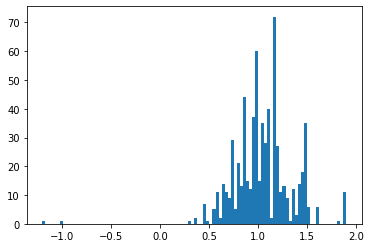

In [86]:
plt.hist(np.nan_to_num(all_dif_gpt).values(),100)

#### check one CAS number only

100-51-6: sweet

6485-40-1: not sweet

In [147]:
check_CAS(violin_df,'100-51-6','Sweet')

1.4219386139951735

In [148]:
check_CAS(violin_df, '6485-40-1', 'Sweet')

0.98764797330445

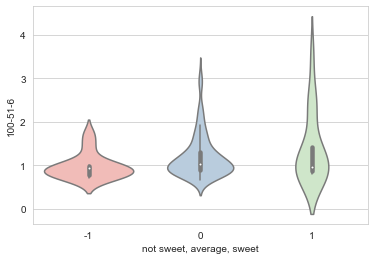

In [149]:
# looking at one specific cas number which was categories as sweet
sns.violinplot(x='category_Sweet',y= '100-51-6', data=violin_df, palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

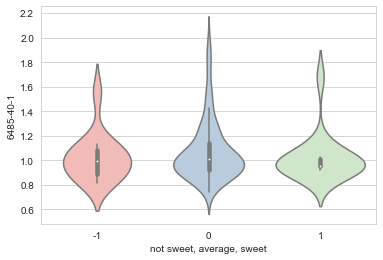

In [150]:
# looking at one specific cas number which was not categories as sweet
sns.violinplot(x='category_Sweet',y= '6485-40-1' , data=violin_df[:-1], palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

#### chat gpt data

In [588]:
check_CAS(violin_df_gpt,'6485-40-1','Sweet')

0.7474756257040938

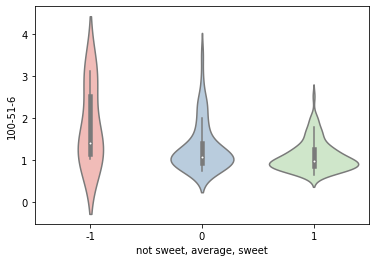

In [589]:
# looking at one specific cas number which was categories as sweet
sns.violinplot(x='category_Sweet',y= '100-51-6', data=violin_df_gpt[:-1], palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

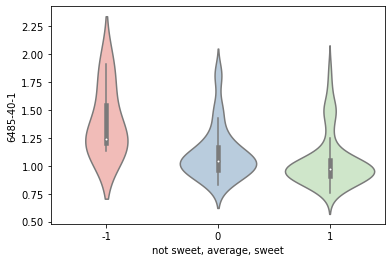

In [590]:
# looking at one specific cas number which was not categories as sweet
sns.violinplot(x='category_Sweet',y= '6485-40-1' , data=violin_df_gpt[:-1], palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

### Looking at all samples and compare flavor labeled cas numbers within a flavor

looking at e.g all sweet CAS numbers and how the intensite of these change in sweet, average sweet and not sweet samples

In [151]:
def get_flavored_CAS(desc_CAS, flavor):
    # filter for CAS numbers labeled sweet
    flavor_cas_vdf = pd.DataFrame.copy(violin_df[desc_CAS] )
    flavor_cas_vdf['category_' + str(flavor)] = pd.DataFrame.copy(violin_df['category_'+ str(flavor)])
    flavor_cas_vdf["sum"]= flavor_cas_vdf.apply(lambda row:row[0:-1].sum(), axis=1)
    flavor_cas_vdf["mean"]= flavor_cas_vdf.apply(lambda row:row[0:-2].mean(), axis=1)
    flavor_cas_vdf["median"]= flavor_cas_vdf.apply(lambda row:row[0:-3].median(), axis=1)
    return(flavor_cas_vdf)

In [152]:
sweet_cas_violin_df = get_flavored_CAS(sweet_descriptors_CAS,"Sweet")
woody_cas_violin_df = get_flavored_CAS(wood_descriptors_CAS,"Woody")
fruity_cas_violin_df = get_flavored_CAS(fruit_descriptors_CAS,"Fruity")
malt_cas_violin_df = get_flavored_CAS(malt_descriptors_CAS,"Malt")

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Franz\

In [153]:
malt_cas_violin_df
# not enough data -> exclude from analysis

,110-62-3,123-51-3,137-32-6,590-86-3,78-84-2,category_Malt,sum,mean,median
sample_key,,,,,,,,,
000656,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000657,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000658,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000838,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000839,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
000925,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000926,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN
000927,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN


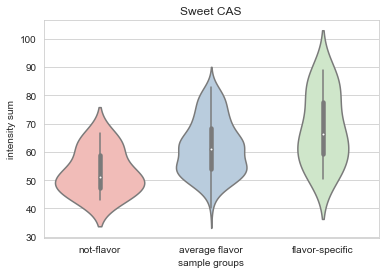

In [116]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category_Sweet', y='sum', data=sweet_cas_violin_df, palette="Pastel1", order=['not-flavor','average flavor', 'flavor-specific'])
plt.title("Sweet CAS")
plt.ylabel("intensity sum")
plt.xlabel("sample groups")
plt.show()

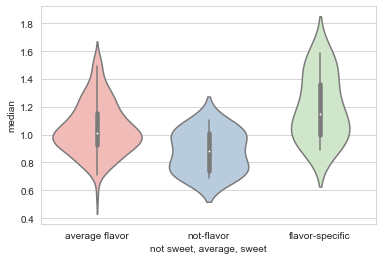

In [117]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category_Sweet', y='median', data=sweet_cas_violin_df, palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

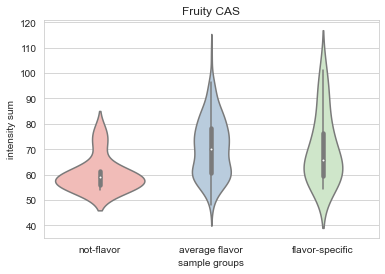

In [118]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category_Fruity', y='sum', data=fruity_cas_violin_df, palette="Pastel1", order=['not-flavor','average flavor', 'flavor-specific'])
plt.title("Fruity CAS")
plt.ylabel("intensity sum")
plt.xlabel("sample groups")
plt.show()

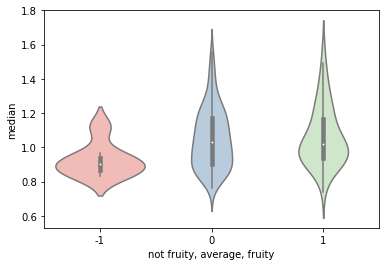

In [626]:
# looking at all cas number which were categories as sweet over all samples

sns.violinplot(x='category_Fruity', y='median', data=fruity_cas_violin_df, palette="Pastel1")
plt.xlabel("not fruity, average, fruity")
plt.show()

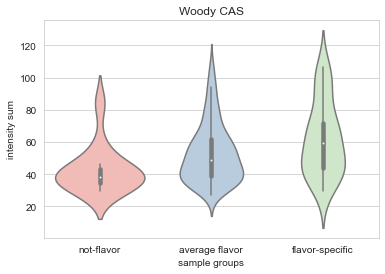

In [119]:
# looking at all cas number which were categories as sweet over all samples

# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category_Woody', y='sum', data=woody_cas_violin_df, palette="Pastel1", order=['not-flavor','average flavor', 'flavor-specific'])
plt.title("Woody CAS")
plt.ylabel("intensity sum")
plt.xlabel("sample groups")
plt.show()


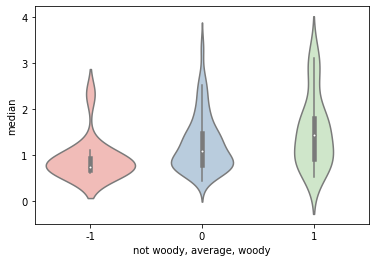

In [628]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category_Woody', y='median', data=woody_cas_violin_df, palette="Pastel1")
plt.xlabel("not woody, average, woody")
plt.show()

#### looking at which cas numbers are significant and whcih are not

In [31]:
def plot_diff_exp_CAS(df,flavor):
    flavor_true = df[df["category_" + str(flavor)] == 1].index
    flavor_false = df[df["category_" + str(flavor)] == -1].index
    plt.figure(figsize=(50, 10))           
    plt.bar(df.loc[flavor_true].iloc[:,:-4].columns, df.loc[flavor_true].iloc[:,:-4].mean(axis=0), color='b', alpha=0.5)
    plt.bar(df.loc[flavor_false].iloc[:,:-4].columns, df.loc[flavor_false].iloc[:,:-4].mean(axis=0),color="g",  alpha=0.5)
    plt.xlabel('CAS numbers')
    plt.ylabel('intensities over all samples')
    plt.title('labeled CAS numbers x intensities over all samples ')
    legend_entries = [Line2D([0], [0], color='b', lw=4, label=str(flavor) + ' samples'),
                    Line2D([0], [0], color='g', lw=4, label='not ' +str(flavor) +' sweet samples')]
    plt.legend(handles=legend_entries)
    plt.show()


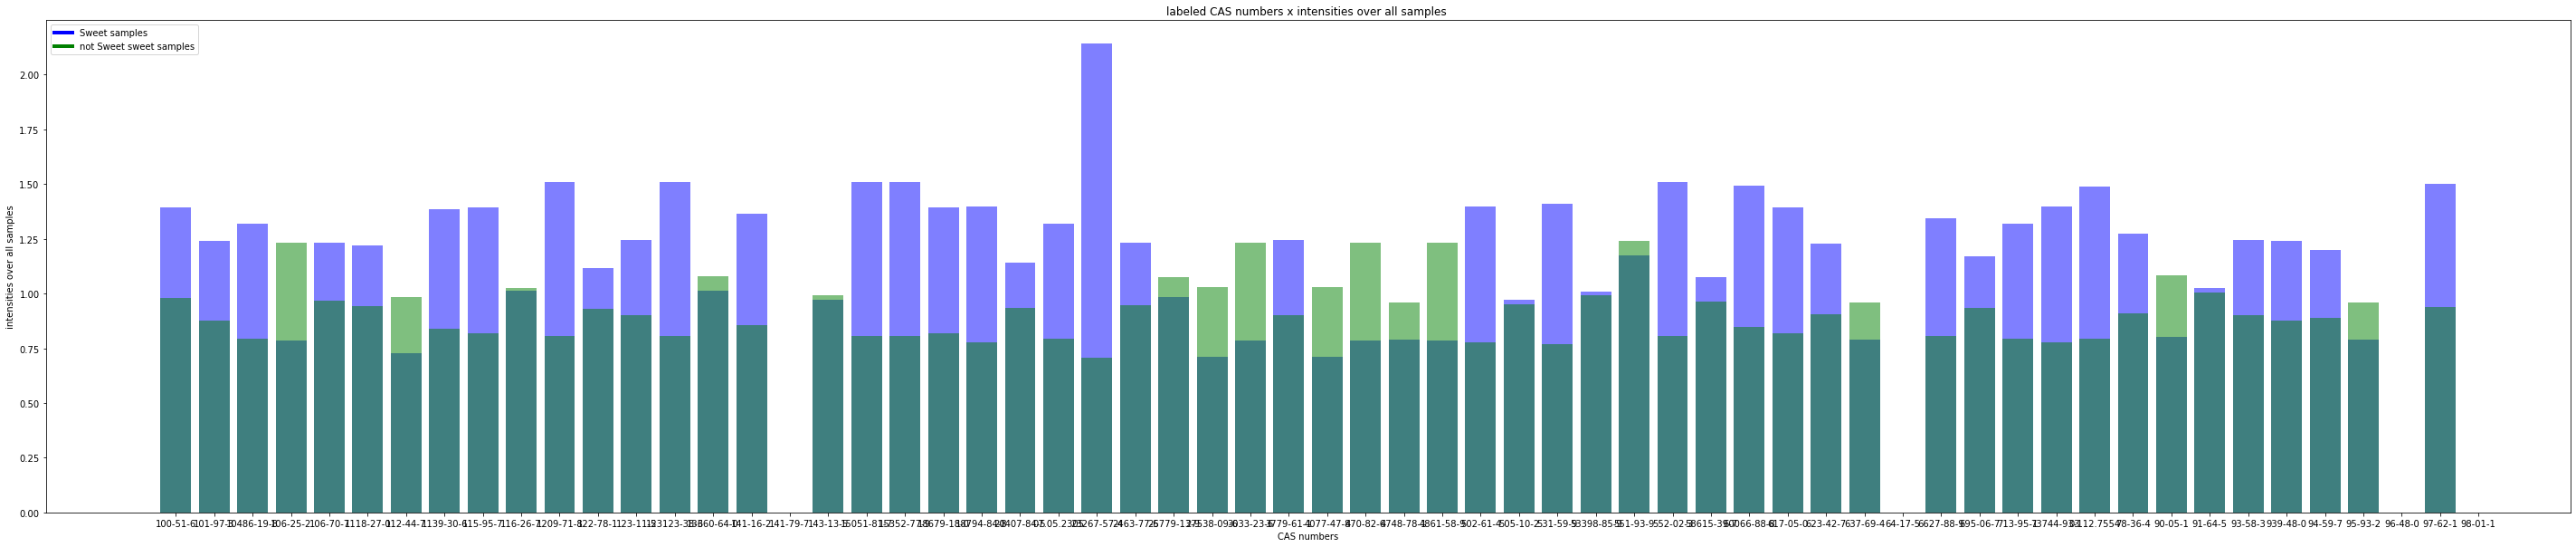

In [32]:
plot_diff_exp_CAS(sweet_cas_violin_df,"Sweet")

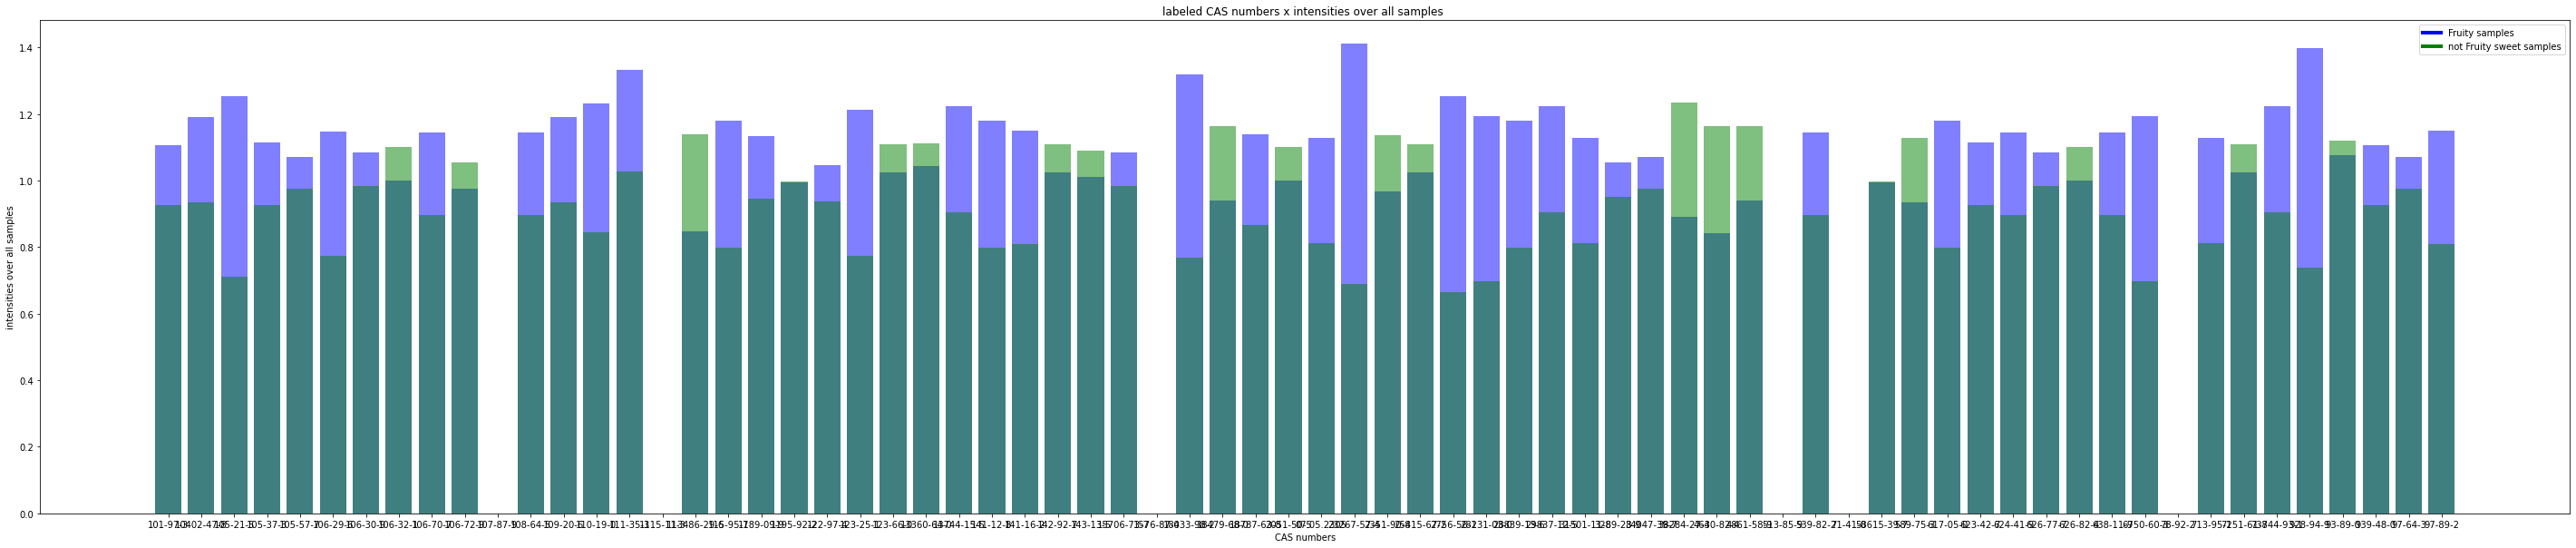

In [635]:
plot_diff_exp_CAS(fruity_cas_violin_df,"Fruity")

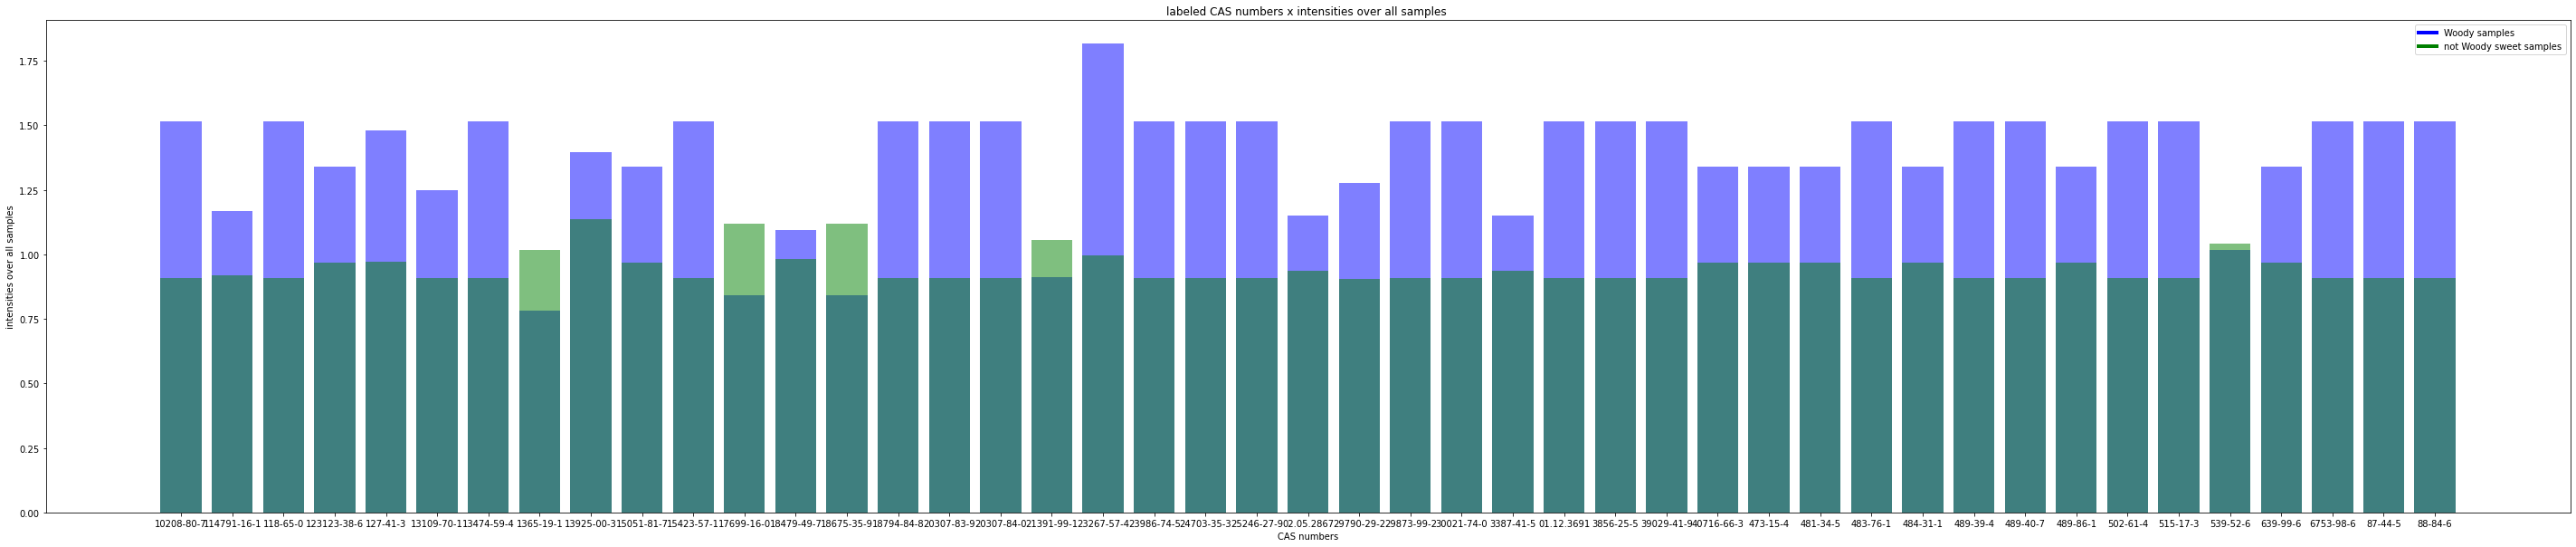

In [637]:
plot_diff_exp_CAS(woody_cas_violin_df,"Woody")

#### chat gpt

In [215]:
# filter for CAS numbers labeled sweet
sweet_cas_violin_df_gpt = pd.DataFrame.copy(violin_df_gpt[sweet_descriptors_CAS] )
sweet_cas_violin_df_gpt['category_Sweet'] = pd.DataFrame.copy(violin_df_gpt['category_Sweet'])
#sweet_cas_violin_df = contains all sample and only those CAS numbers which are labeled as sweet
sweet_cas_violin_df_gpt["sum"]= sweet_cas_violin_df_gpt.apply(lambda row:row[0:-1].sum(), axis=1)
sweet_cas_violin_df_gpt["mean"]= sweet_cas_violin_df_gpt.apply(lambda row:row[0:-2].mean(), axis=1)

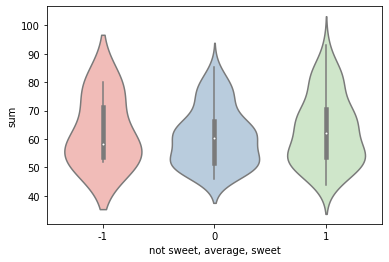

In [216]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category_Sweet', y='sum', data=sweet_cas_violin_df_gpt, palette="Pastel1")
plt.xlabel("not sweet, average, sweet")
plt.show()

In [217]:
flavor_true_sweet_gpt = sweet_cas_violin_df_gpt[sweet_cas_violin_df_gpt["category_Sweet"] == 1].index
flavor_true_not_sweet_gpt = sweet_cas_violin_df_gpt[sweet_cas_violin_df_gpt["category_Sweet"] == -1].index


In [118]:
flavor_true_sweet_gpt

Index(['000354', '000361', '000362', '000367', '000371', '000373', '000377',
       '000378', '000386', '000388', '000389', '000390', '000404', '000430',
       '000431', '000434', '000441', '000447', '000451', '000452', '000453',
       '000477', '000479', '000480', '000484', '000489', '000492', '000493',
       '000494', '000504', '000529', '000548', '000557', '000558', '000559',
       '000564', '000572', '000574', '000575', '000576', '000577', '000578',
       '000586', '000588', '000591', '000593', '000606', '000607', '000610',
       '000611', '000613', '000614', '000617', '000618', '000622', '000626',
       '000627', '000628', '000629', '000633', '000635', '000636', '000642',
       '000655', '000763', '000783', '000789', '000796', '000797', '000813',
       '000815', '000835', '000842', '000856', '000874', '000875', '000878',
       '000879', '000880', '000909', '000911', '000925'],
      dtype='object', name='sample_key')

In [119]:
flavor_true_not_sweet_gpt

Index(['000357', '000408', '000410', '000515', '000654', '000656'], dtype='object', name='sample_key')

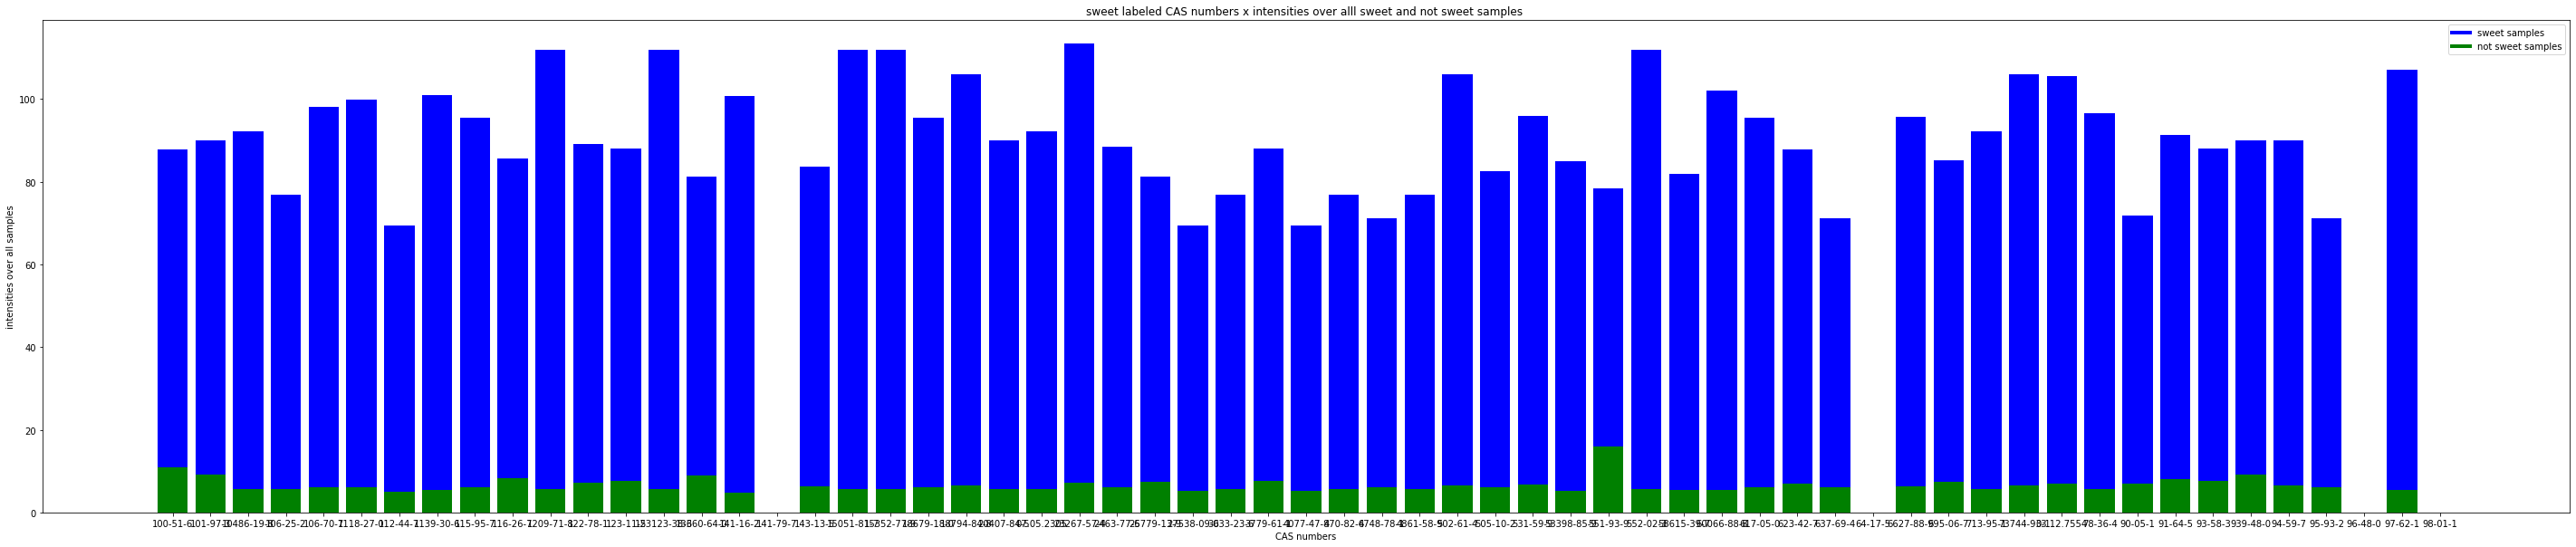

In [120]:
plt.figure(figsize=(50, 10))           
plt.bar(sweet_cas_violin_df_gpt.loc[flavor_true_sweet_gpt].iloc[:,:-3].columns, sweet_cas_violin_df_gpt.loc[flavor_true_sweet_gpt].iloc[:,:-3].sum(axis=0), color='b')
plt.bar(sweet_cas_violin_df_gpt.loc[flavor_true_not_sweet_gpt].iloc[:,:-3].columns, sweet_cas_violin_df_gpt.loc[flavor_true_not_sweet_gpt].iloc[:,:-3].sum(axis=0),color="g")
plt.xlabel('CAS numbers')
plt.ylabel('intensities over all samples')
plt.title('sweet labeled CAS numbers x intensities over alll sweet and not sweet samples ')
legend_entries = [Line2D([0], [0], color='b', lw=4, label='sweet samples'),
                  Line2D([0], [0], color='g', lw=4, label='not sweet samples')]
plt.legend(handles=legend_entries)
plt.show()
# => bias because there are qay more samples labeld sweet than not sweet so sum doesn't say anything


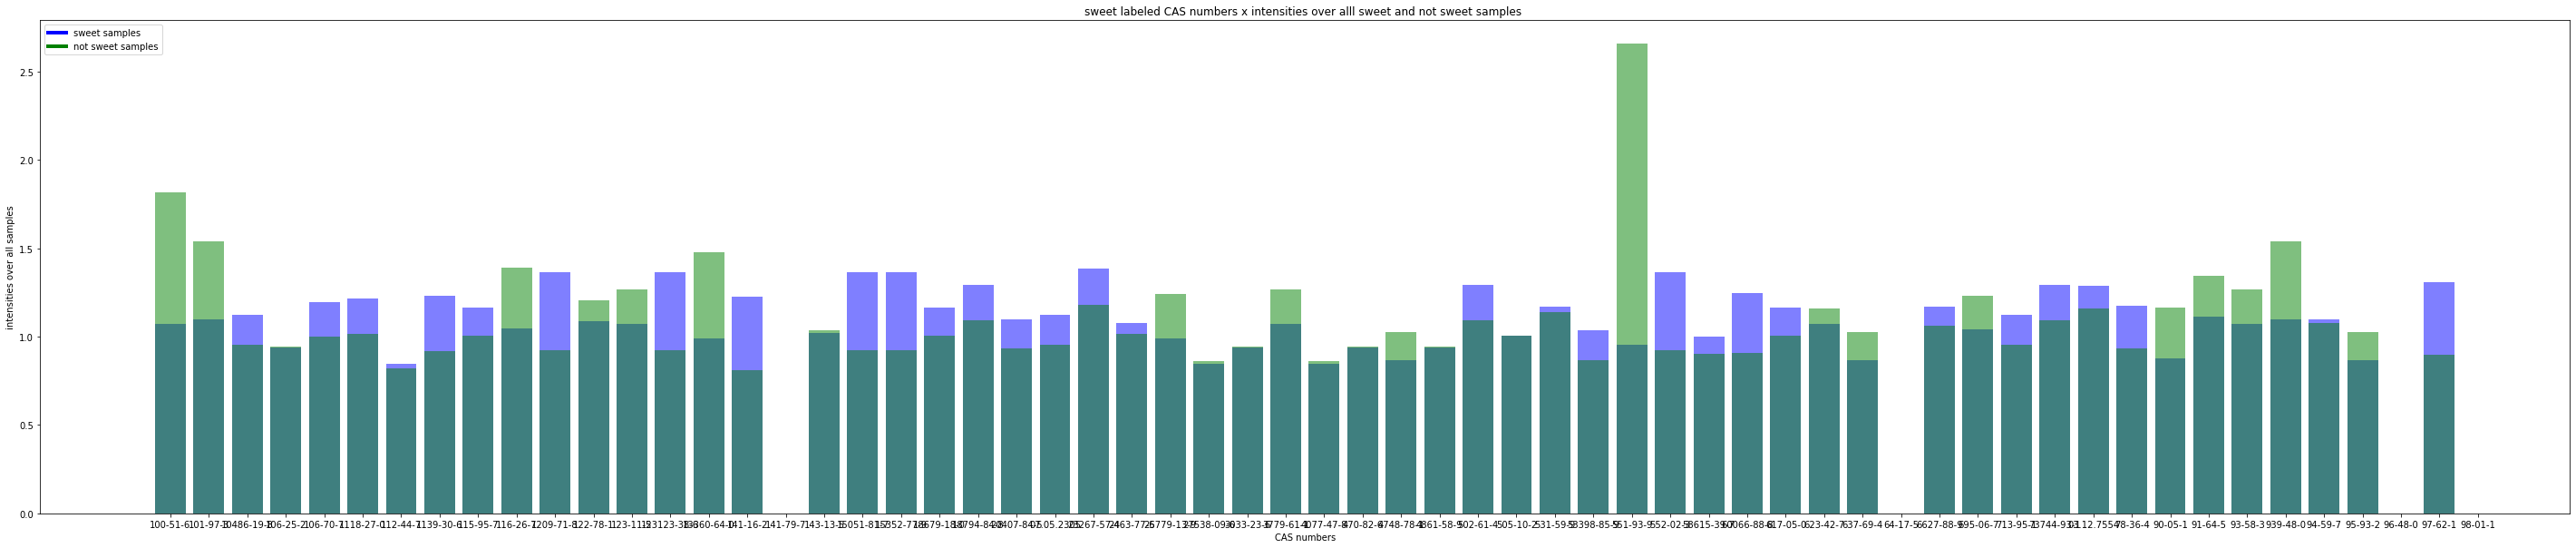

In [121]:
plt.figure(figsize=(50, 10))           
plt.bar(sweet_cas_violin_df_gpt.loc[flavor_true_sweet_gpt].iloc[:,:-3].columns, sweet_cas_violin_df_gpt.loc[flavor_true_sweet_gpt].iloc[:,:-3].mean(axis=0), color='b', alpha=0.5)
plt.bar(sweet_cas_violin_df_gpt.loc[flavor_true_not_sweet_gpt].iloc[:,:-3].columns, sweet_cas_violin_df_gpt.loc[flavor_true_not_sweet_gpt].iloc[:,:-3].mean(axis=0),color="g",  alpha=0.5)
plt.xlabel('CAS numbers')
plt.ylabel('intensities over all samples')
plt.title('sweet labeled CAS numbers x intensities over alll sweet and not sweet samples ')
legend_entries = [Line2D([0], [0], color='b', lw=4, label='sweet samples'),
                  Line2D([0], [0], color='g', lw=4, label='not sweet samples')]
plt.legend(handles=legend_entries)
plt.show()


## T - Test
### checking difference of intensity for one CAS between different samples

In [154]:
from scipy import stats  

In [155]:
flavor_true = violin_df[violin_df["category_Sweet"] == 1].index
flavor_false = violin_df[violin_df["category_Sweet"] == -1].index
t_stat, p_val = stats.ttest_ind(violin_df['100-51-6'].loc[flavor_true], violin_df['100-51-6'].loc[flavor_false])  
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))


t-statistic = 1.770159364236142
p-value = 0.08759008413931094


In [156]:
check_CAS(violin_df,'100-51-6','Sweet')

1.4219386139951735

### checking difference of intensity for all CAS between different samples

In [157]:
def check_significant_CAS(df, flavor):
    #check this for all Cas numbers that are available
    alpha = 0.05
    labels=[]
    p_values = []
    significant_CAS =[]
    flavor_true = df[df["category_"+ flavor] == 1].index
    flavor_false = df[df["category_"+flavor] == -1].index
    for CAS in df.iloc[:,:-4].columns:
        t_stat, p_val = stats.ttest_ind(df[CAS].loc[flavor_true], df[CAS].loc[flavor_false])  
        print("CAS: " +str(CAS))
        print("t-statistic = " + str(t_stat))  
        print("p-value = " + str(p_val))
        labels.append(CAS)
        p_values.append(p_val)
        if p_val < alpha:
            significant_CAS.append(CAS)
    return(labels, p_values, significant_CAS)

#### sweet

In [158]:
alpha = 0.05

In [159]:
sweet_label, sweet_p_val, sweet_sig_CAS = check_significant_CAS(sweet_cas_violin_df, "Sweet")

CAS: 100-51-6
t-statistic = 1.770159364236142
p-value = 0.08759008413931094
CAS: 101-97-3
t-statistic = 3.1847467646659187
p-value = 0.003539022629342556
CAS: 10486-19-8
t-statistic = 3.8579810081019525
p-value = 0.0006141507147269126
CAS: 106-25-2
t-statistic = -4.382276797268179
p-value = 0.0001496635561087369
CAS: 106-70-7
t-statistic = 2.541390374190605
p-value = 0.01686349812619566
CAS: 1118-27-0
t-statistic = 2.6878111239031743
p-value = 0.011969523161895354
CAS: 112-44-7
t-statistic = -2.702275189940866
p-value = 0.011565890188159933
CAS: 1139-30-6
t-statistic = 3.0988633547485787
p-value = 0.0043922193578478565
CAS: 115-95-7
t-statistic = 3.8259665238299525
p-value = 0.0006687471581336039
CAS: 116-26-7
t-statistic = -0.18237308900034158
p-value = 0.8566039472430411
CAS: 1209-71-8
t-statistic = 3.2589232295622117
p-value = 0.002932121625092656
CAS: 122-78-1
t-statistic = 2.435442603584567
p-value = 0.021495786675420413
CAS: 123-11-5
t-statistic = 2.942691477335345
p-value = 0.00


t-statistic = -4.382276797268179
p-value = 0.0001496635561087369
CAS: 4748-78-1
t-statistic = -2.3363207296394646
p-value = 0.026859346680814633
CAS: 4861-58-9
t-statistic = -4.382276797268179
p-value = 0.0001496635561087369
CAS: 502-61-4
t-statistic = 3.42702274471465
p-value = 0.0019048665327345234
CAS: 505-10-2
t-statistic = 0.42198708917512584
p-value = 0.676256983089486
CAS: 531-59-9
t-statistic = 3.8568814729514243
p-value = 0.0006159512541679596
CAS: 53398-85-9
t-statistic = 0.2352906697619621
p-value = 0.815695515824265
CAS: 551-93-9
t-statistic = -0.24269978357601732
p-value = 0.8100070454325274
CAS: 552-02-3
t-statistic = 3.2589232295622117
p-value = 0.002932121625092656
CAS: 58615-39-7
t-statistic = 1.4752470445531403
p-value = 0.15130331901758248
CAS: 60066-88-8
t-statistic = 3.5594832572891844
p-value = 0.0013500545591794873
CAS: 617-05-0
t-statistic = 3.8259665238299525
p-value = 0.0006687471581336039
CAS: 623-42-7
t-statistic = 2.938374016354443
p-value = 0.006538746128

In [160]:
len(sweet_sig_CAS)/len(sweet_cas_violin_df.iloc[:,:-4].columns)

0.7377049180327869

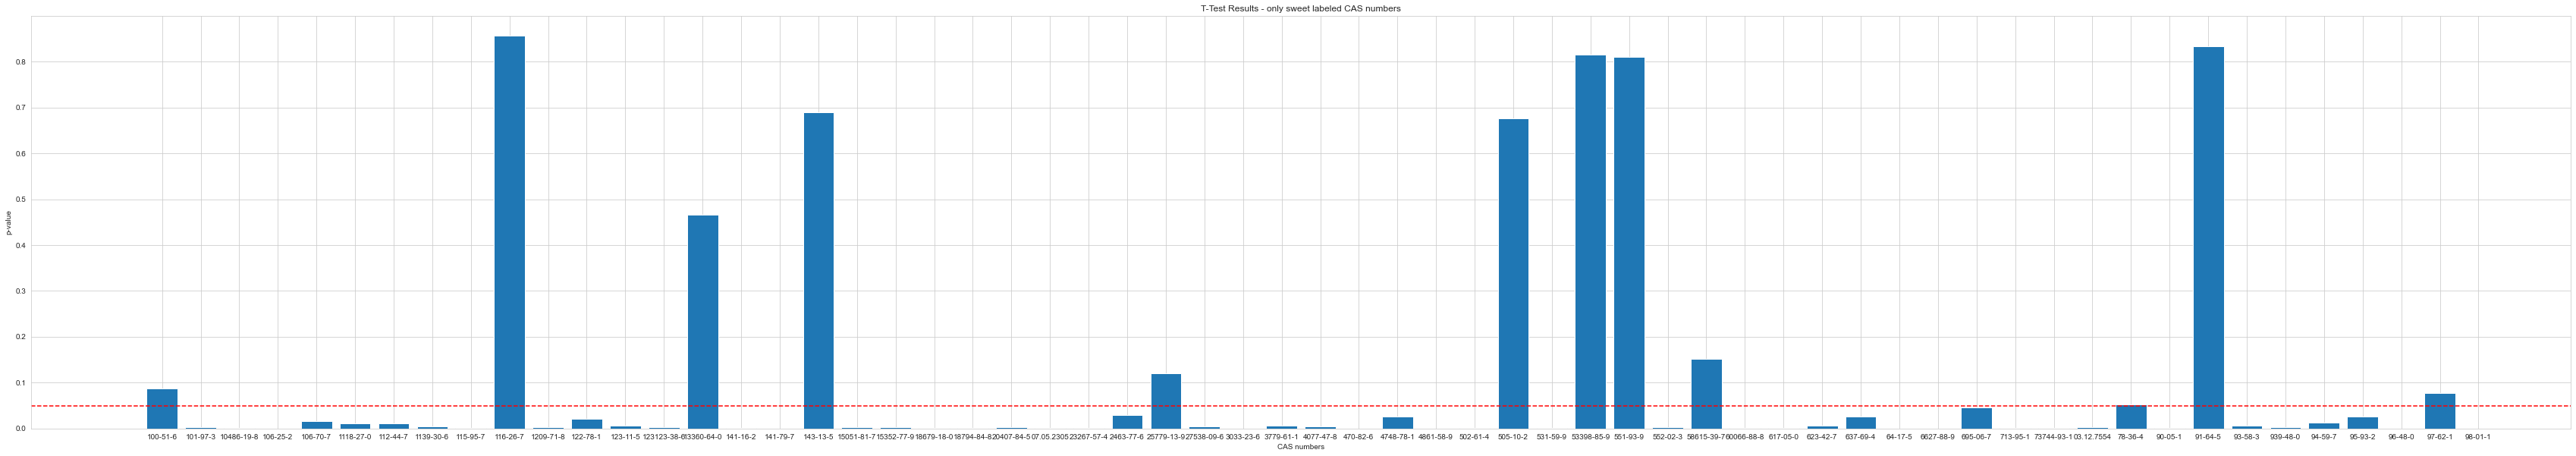

In [161]:
# bar chart of p values
plt.figure(figsize=(60, 10))           
plt.bar(sweet_label, sweet_p_val)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('CAS numbers')
plt.ylabel('p-value')
plt.title('T-Test Results - only sweet labeled CAS numbers')
plt.show()


### fruit 

In [162]:
label_all_fruit,p_val_all_fruit, significant_CAS_all_fruit = check_significant_CAS(fruity_cas_violin_df,'Fruity')

CAS: 101-97-3
t-statistic = 1.9248488811428321
p-value = 0.06446305792495077
CAS: 10402-47-8
t-statistic = 2.0928924387346934
p-value = 0.045541849839620736
CAS: 105-21-5
t-statistic = 2.423598398194733
p-value = 0.022080572994081275
CAS: 105-37-3
t-statistic = 1.6038206027044493
p-value = 0.11997567688861138
CAS: 105-57-7
t-statistic = 2.2787440474249805
p-value = 0.030508532571976346
CAS: 106-29-6
t-statistic = 2.7053857329738547
p-value = 0.011480766563373586
CAS: 106-30-9
t-statistic = 1.4594445603221449
p-value = 0.1555717772858637
CAS: 106-32-1
t-statistic = -2.558684410682398
p-value = 0.01620142628593866
CAS: 106-70-7
t-statistic = 2.6017959522380445
p-value = 0.014654382880024752
CAS: 106-72-9
t-statistic = -2.187824357528625
p-value = 0.037190736968242245
CAS: 107-87-9
t-statistic = nan
p-value = nan
CAS: 108-64-5
t-statistic = 2.6017959522380445
p-value = 0.014654382880024752
CAS: 109-20-6
t-statistic = 2.0928924387346934
p-value = 0.045541849839620736
CAS: 110-19-0
t-statis


p-value = 0.004140800752657546
CAS: 28839-13-6
t-statistic = 2.4681466629144064
p-value = 0.019954107570330733
CAS: 29837-12-5
t-statistic = 1.092039853370381
p-value = 0.28412321614147795
CAS: 31501-11-8
t-statistic = 1.8111712247911314
p-value = 0.0808560367598462
CAS: 3289-28-9
t-statistic = 0.717033233924131
p-value = 0.4792927785510448
CAS: 34047-39-7
t-statistic = 2.2787440474249805
p-value = 0.030508532571976346
CAS: 38284-27-4
t-statistic = -4.19604273379568
p-value = 0.00024789355045523663
CAS: 4630-82-4
t-statistic = -3.1004163642087077
p-value = 0.004375177985657046
CAS: 4861-58-9
t-statistic = -2.098286422864329
p-value = 0.04502600810763351
CAS: 513-85-9
t-statistic = nan
p-value = nan
CAS: 539-82-2
t-statistic = 2.6017959522380445
p-value = 0.014654382880024752
CAS: 71-41-0
t-statistic = nan
p-value = nan
CAS: 58615-39-7
t-statistic = -0.39020265764605633
p-value = 0.6993394242756104
CAS: 589-75-3
t-statistic = -3.005097263588466
p-value = 0.005546983940957087
CAS: 617-0

In [163]:
len(significant_CAS_all_fruit)/len(fruity_cas_violin_df.iloc[:,:-4].columns)

0.5142857142857142

In [164]:
len(fruity_cas_violin_df.iloc[:,:-4].columns)

70

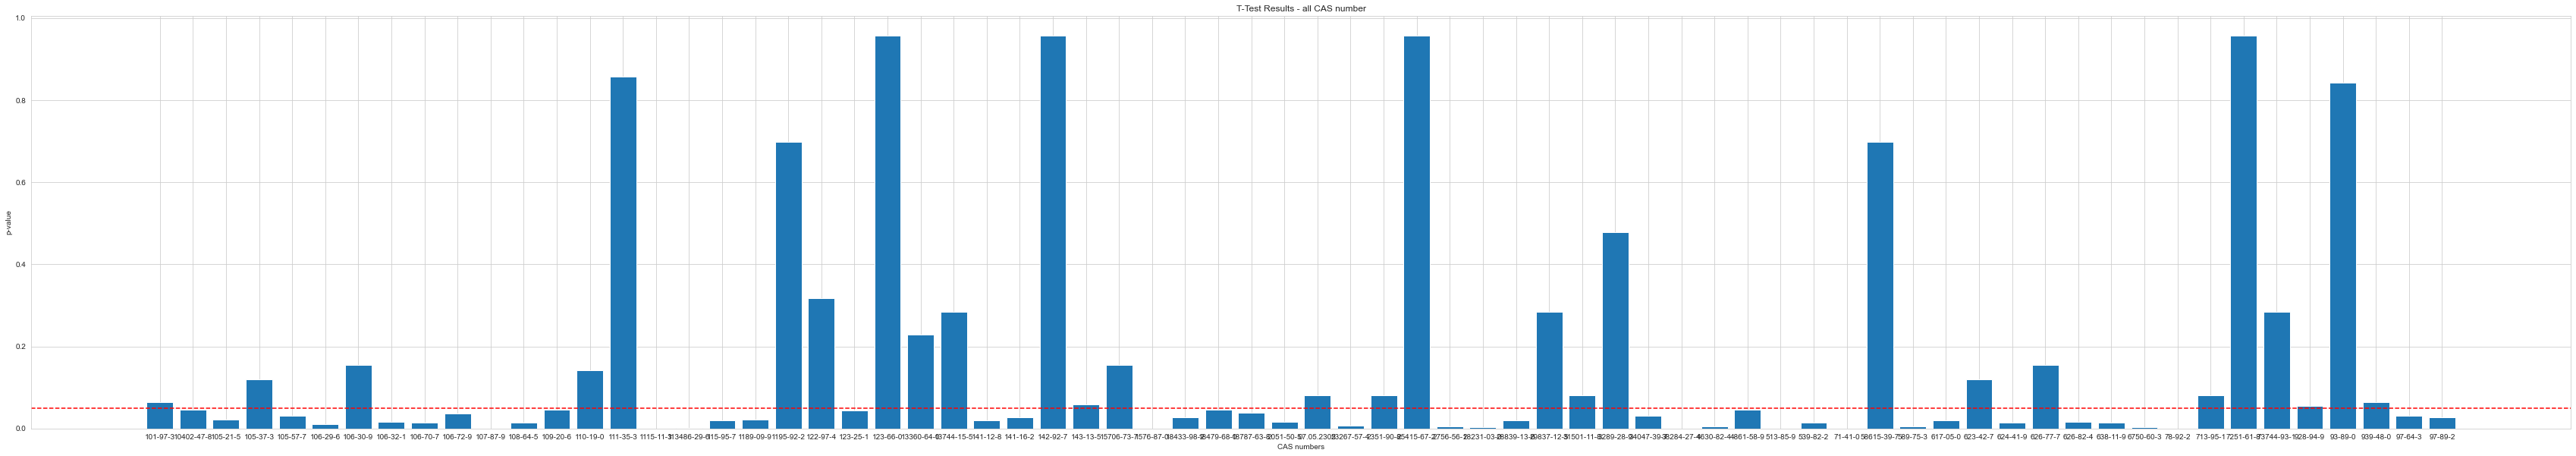

In [165]:
# bar chart of p values
plt.figure(figsize=(60, 10))           
plt.bar(label_all_fruit, p_val_all_fruit)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('CAS numbers')
plt.ylabel('p-value')
plt.title('T-Test Results - all CAS number')

plt.show()


### wood 

In [166]:
label_all_wood,p_val_all_wood, significant_CAS_all_wood = check_significant_CAS(woody_cas_violin_df,'Woody')


CAS: 10208-80-7
t-statistic = 2.605915170762272
p-value = 0.012808298841639282
CAS: 114791-16-1
t-statistic = 2.276706451203615
p-value = 0.02822806788739129
CAS: 118-65-0
t-statistic = 2.605915170762272
p-value = 0.012808298841639282
CAS: 123123-38-6
t-statistic = 2.0462750873772655
p-value = 0.047341351849093945
CAS: 127-41-3
t-statistic = 2.2149167990050325
p-value = 0.03252461117059941
CAS: 13109-70-1
t-statistic = 2.6752815610600695
p-value = 0.010765764784944475
CAS: 13474-59-4
t-statistic = 2.605915170762272
p-value = 0.012808298841639282
CAS: 1365-19-1
t-statistic = -2.560215767724386
p-value = 0.014342341447026931
CAS: 13925-00-3
t-statistic = 1.2471036918156635
p-value = 0.21961237196266797
CAS: 15051-81-7
t-statistic = 2.0462750873772655
p-value = 0.047341351849093945
CAS: 15423-57-1
t-statistic = 2.605915170762272
p-value = 0.012808298841639282
CAS: 17699-16-0
t-statistic = -2.8570666873883677
p-value = 0.006753093533891241
CAS: 18479-49-7
t-statistic = 1.3330268700541512
p


t-statistic = 2.605915170762272
p-value = 0.012808298841639282
CAS: 25246-27-9
t-statistic = 2.605915170762272
p-value = 0.012808298841639282
CAS: 02.05.2867
t-statistic = 1.949835911629273
p-value = 0.058229588109150375
CAS: 29790-29-2
t-statistic = 2.696227283524578
p-value = 0.010210788244714752
CAS: 29873-99-2
t-statistic = 2.605915170762272
p-value = 0.012808298841639282
CAS: 30021-74-0
t-statistic = 2.605915170762272
p-value = 0.012808298841639282
CAS: 3387-41-5
t-statistic = 1.949835911629273
p-value = 0.058229588109150375
CAS: 01.12.3691
t-statistic = 2.605915170762272
p-value = 0.012808298841639282
CAS: 3856-25-5
t-statistic = 2.605915170762272
p-value = 0.012808298841639282
CAS: 39029-41-9
t-statistic = 2.605915170762272
p-value = 0.012808298841639282
CAS: 40716-66-3
t-statistic = 2.0462750873772655
p-value = 0.047341351849093945
CAS: 473-15-4
t-statistic = 2.0462750873772655
p-value = 0.047341351849093945
CAS: 481-34-5
t-statistic = 2.0462750873772655
p-value = 0.0473413518

In [167]:
len(significant_CAS_all_wood)/len(woody_cas_violin_df.iloc[:,:-4].columns)


0.8666666666666667

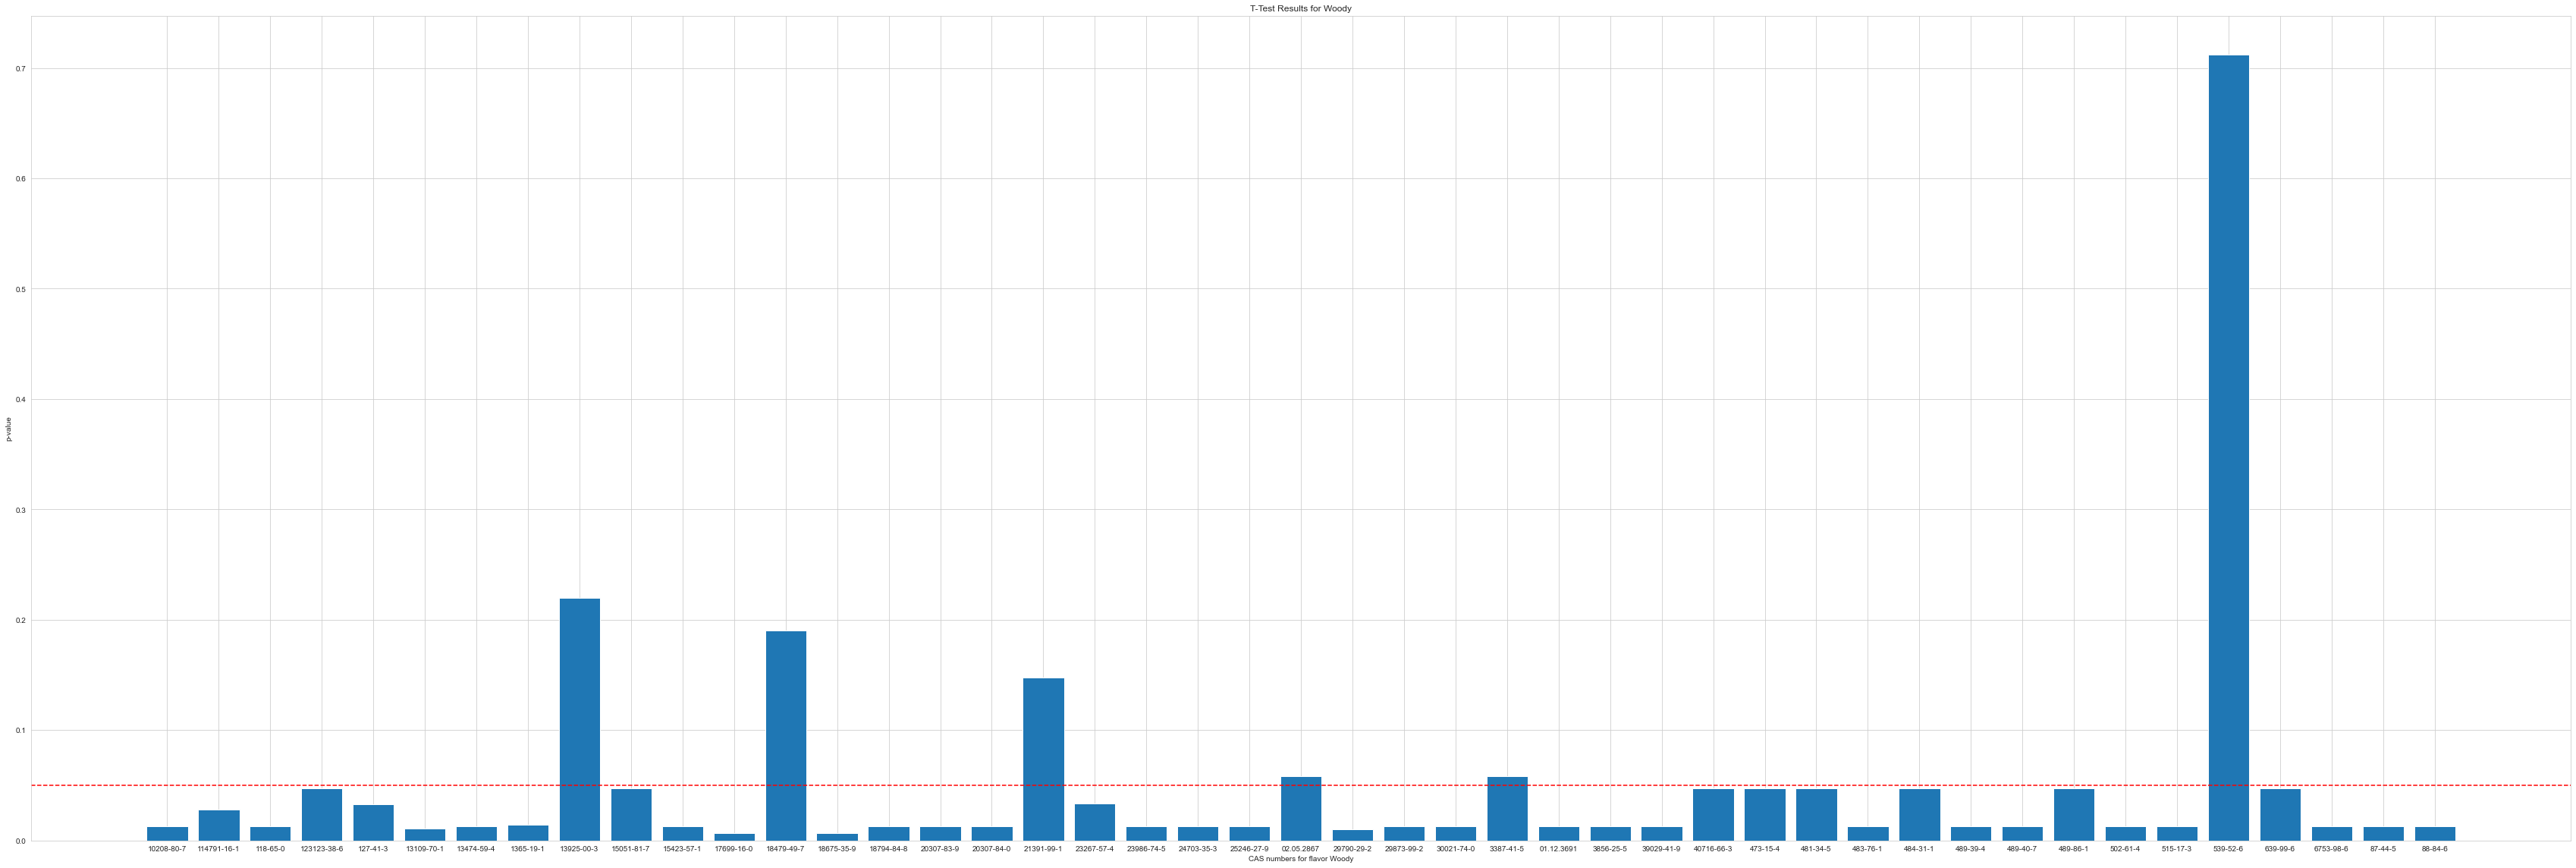

In [170]:
# bar chart of p values
plt.figure(figsize=(60, 20))           
plt.bar(label_all_wood, p_val_all_wood)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('CAS numbers for flavor Woody')
plt.ylabel('p-value')
plt.title('T-Test Results for Woody')

plt.show()


##### all CAS numbers regardless the lable
=> Don't really make sense to compare with other CAS number which are not labeled sweet since they still can have a high intensity but correspond to different flavors

In [ ]:
label_all,p_val_all, significant_CAS_all = check_significant_CAS(violin_df,'Sweet')

CAS: 6485-40-1
t-statistic = -0.18237308900034158
p-value = 0.8566039472430411
CAS: 3033-23-6
t-statistic = -4.382276797268179
p-value = 0.0001496635561087369
CAS: 21284-22-0
t-statistic = 3.2589232295622117
p-value = 0.002932121625092656
CAS: 38427-78-0
t-statistic = 3.5594832572891844
p-value = 0.0013500545591794873
CAS: 495-61-4
t-statistic = 3.42702274471465
p-value = 0.0019048665327345234
CAS: 29873-99-2
t-statistic = 3.42702274471465
p-value = 0.0019048665327345234
CAS: 6909-30-4
t-statistic = 1.4752470445531403
p-value = 0.15130331901758248
CAS: 99-49-0
t-statistic = -0.18237308900034158
p-value = 0.8566039472430411
CAS: 2244-16-8
t-statistic = -0.18237308900034158
p-value = 0.8566039472430411
CAS: 876-17-5
t-statistic = -4.382276797268179
p-value = 0.0001496635561087369
CAS: 5989-27-5
t-statistic = 2.942691477335345
p-value = 0.006469789897028551
CAS: 4674-50-4
t-statistic = 3.5594832572891844
p-value = 0.0013500545591794873
CAS: 2243-33-6
t-statistic = 2.942691477335345
p-valu

0.5614754098360656

In [ ]:
len(significant_CAS_all)/len(label_all)

0.5622435020519836

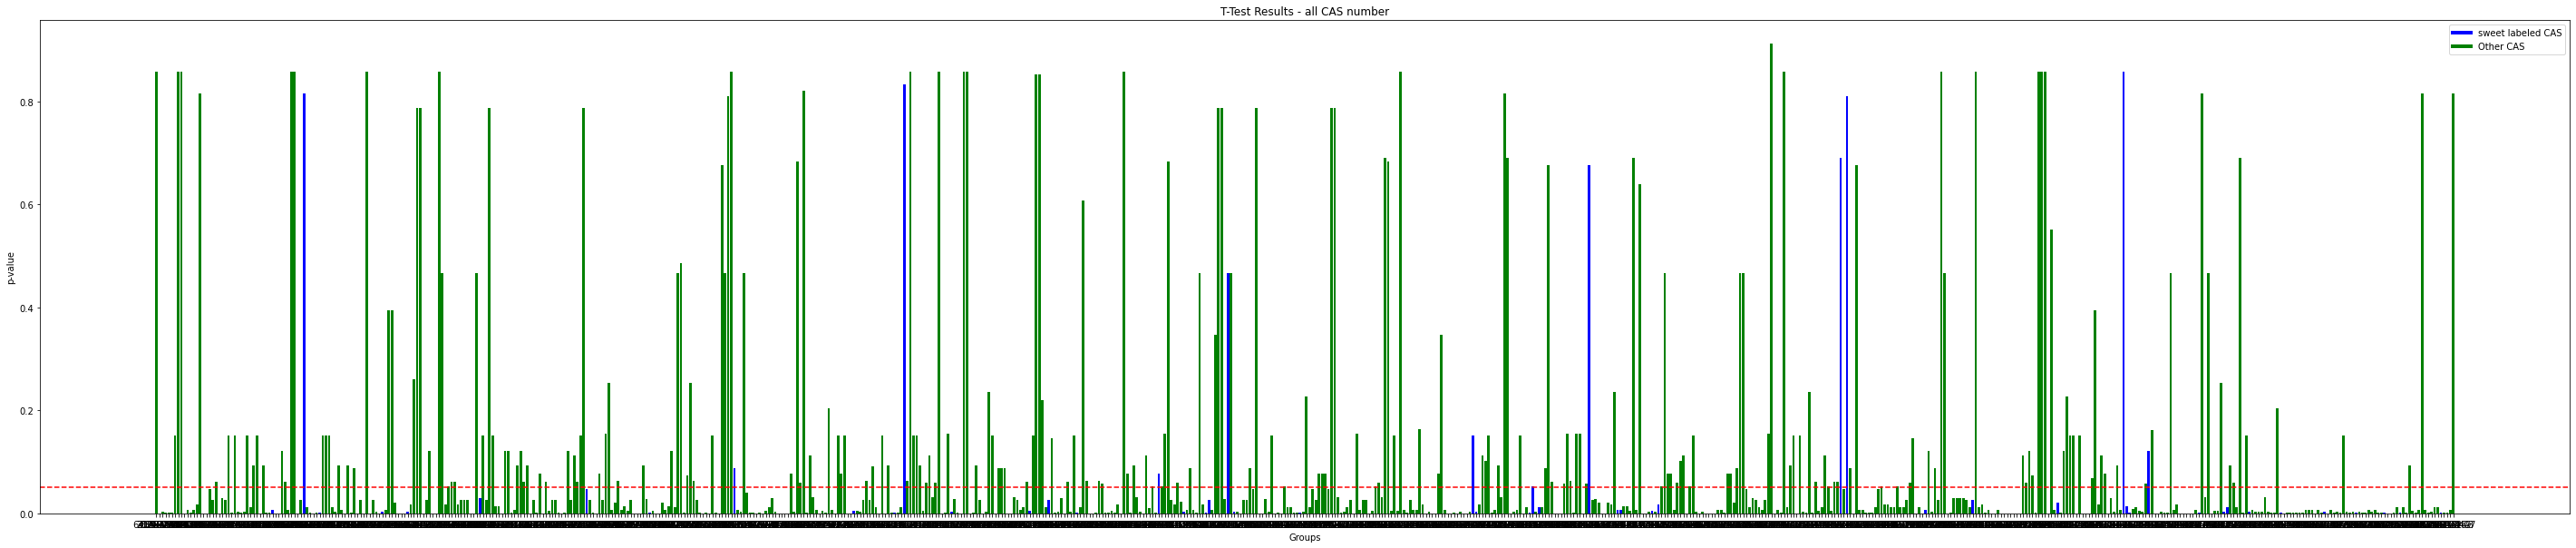

In [ ]:
# bar chart of p values
plt.figure(figsize=(50, 10))           
colors = ['b' if x in sweet_descriptors_CAS else 'g' for x in label_all]
plt.bar(label_all, p_val_all, color=colors)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('Groups')
plt.ylabel('p-value')
plt.title('T-Test Results - all CAS number')
legend_entries = [Line2D([0], [0], color='b', lw=4, label='sweet labeled CAS'),
                  Line2D([0], [0], color='g', lw=4, label='Other CAS')]
plt.legend(handles=legend_entries)

plt.show()


### chat gpt

only sweet CAS 

In [ ]:
sweet_label_gpt, sweet_p_val_gpt, sweet_sig_CAS_gpt = check_significant_CAS(sweet_cas_violin_df_gpt, "Sweet")

NameError: name 'sweet_cas_violin_df_gpt' is not defined

In [ ]:
flavor_true_gpt = violin_df_gpt[violin_df_gpt["category_sweet"] == 1].index
flavor_false_gpt= violin_df_gpt[violin_df_gpt["category_sweet"] == -1].index

KeyError: 'category_sweet'

In [ ]:
#check this for all Cas numbers that are labeled sweet
alpha = 0.05
labels_gpt=[]
p_values_gpt = []
significant_CAS_gpt =[]
for CAS in sweet_cas_violin_df_gpt.iloc[:,:-3].columns:
    t_stat, p_val = stats.ttest_ind(violin_df_gpt[CAS].loc[flavor_true_gpt], violin_df_gpt[CAS].loc[flavor_false_gpt])  
    print("CAS: " +str(CAS))
    print("t-statistic = " + str(t_stat))  
    print("p-value = " + str(p_val))
    labels_gpt.append(CAS)
    p_values_gpt.append(p_val)
    if p_val < alpha:
        significant_CAS_gpt.append(CAS)

CAS: 100-51-6
t-statistic = -3.765572445901877
p-value = 0.0003032980359471206
CAS: 101-97-3
t-statistic = -2.83184966929136
p-value = 0.005762565203588103
CAS: 10486-19-8
t-statistic = 1.00178963423999
p-value = 0.31925562935503793
CAS: 106-25-2
t-statistic = -0.04923575352643576
p-value = 0.9608455868939667
CAS: 106-70-7
t-statistic = 1.1903229645523763
p-value = 0.23719490745716557
CAS: 1118-27-0
t-statistic = 0.9637027053490674
p-value = 0.3378970263609492
CAS: 112-44-7
t-statistic = 0.20779375233948946
p-value = 0.8358812988883071
CAS: 1139-30-6
t-statistic = 1.5321441270731664
p-value = 0.12915738213022507
CAS: 115-95-7
t-statistic = 0.9438360970047612
p-value = 0.34789748153251265
CAS: 116-26-7
t-statistic = -3.1812969014463706
p-value = 0.002040056421307992
CAS: 1209-71-8
t-statistic = 1.3292710133067873
p-value = 0.1872741699280535
CAS: 122-78-1
t-statistic = -1.048337104719025
p-value = 0.2974206058322122
CAS: 123-11-5
t-statistic = -1.3186915924892395
p-value = 0.19077316804

In [ ]:
len(sweet_sig_CAS_gpt)/len(sweet_cas_violin_df_gpt.iloc[:,:-4].columns)

0.18333333333333332

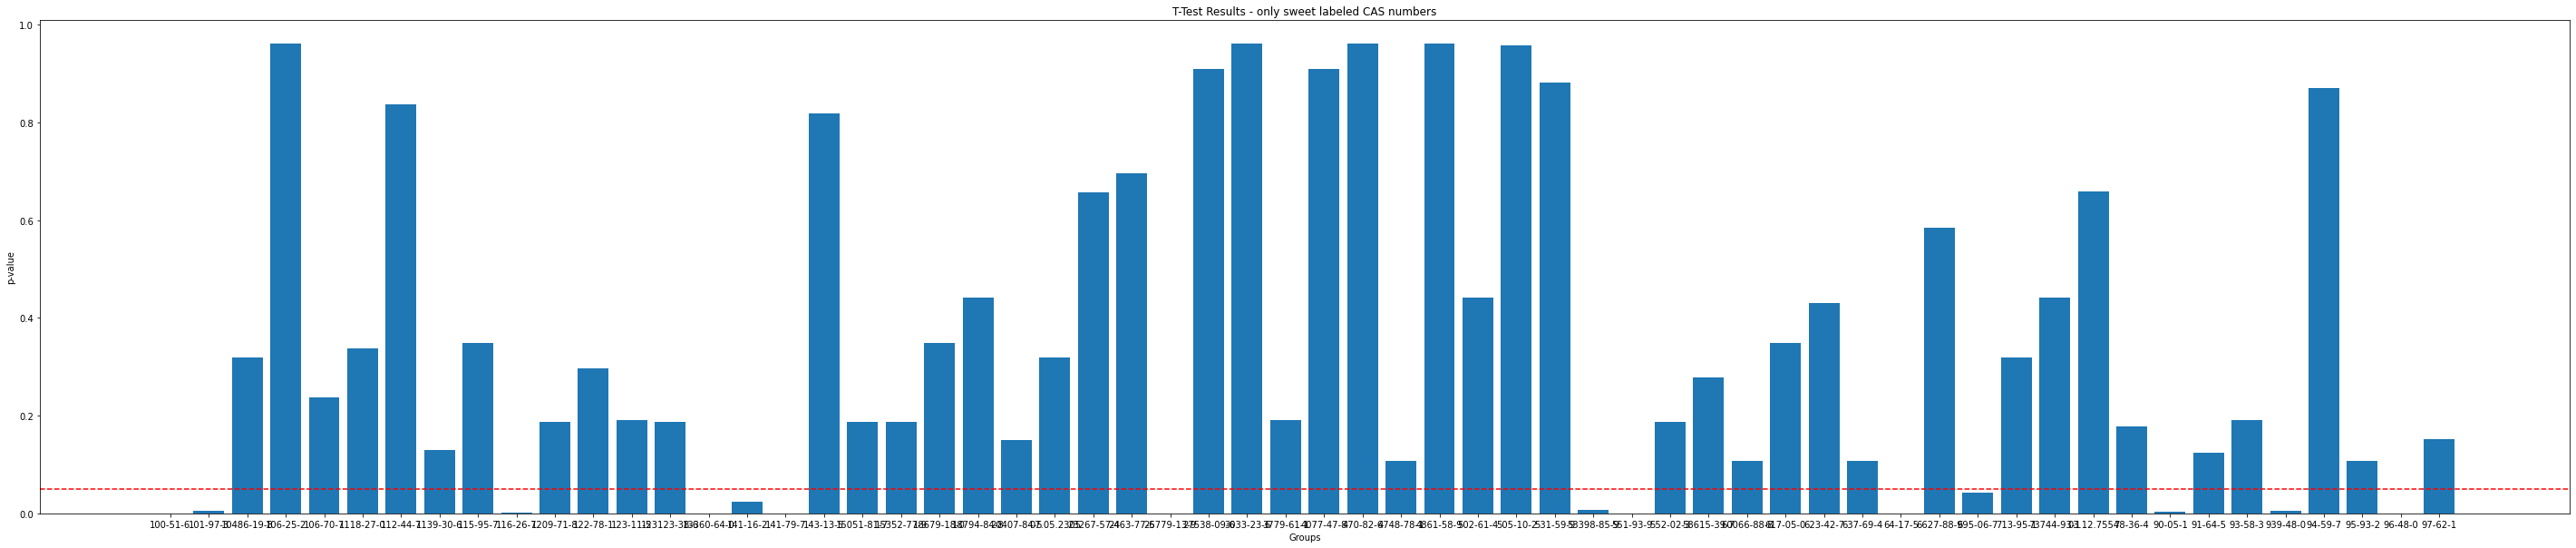

In [ ]:
# bar chart of p values
plt.figure(figsize=(50, 10))           
plt.bar(sweet_label_gpt, sweet_p_val_gpt)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('Groups')
plt.ylabel('p-value')
plt.title('T-Test Results - only sweet labeled CAS numbers')
plt.show()


all CAS numbers

In [ ]:
label_all_gpt,p_val_all_gpt, significant_CAS_all_gpt = check_significant_CAS(violin_df_gpt,'Sweet')

CAS: 6485-40-1
t-statistic = -3.1812969014463706
p-value = 0.002040056421307992
CAS: 3033-23-6
t-statistic = -0.04923575352643576
p-value = 0.9608455868939667
CAS: 21284-22-0
t-statistic = 1.3292710133067873
p-value = 0.1872741699280535
CAS: 38427-78-0
t-statistic = 1.625136095804231
p-value = 0.10779299313873456
CAS: 495-61-4
t-statistic = 0.7728099968512091
p-value = 0.44175366431569585
CAS: 29873-99-2
t-statistic = 0.7728099968512091
p-value = 0.44175366431569585
CAS: 6909-30-4
t-statistic = 1.092206508148184
p-value = 0.27779261694788054
CAS: 99-49-0
t-statistic = -3.1812969014463706
p-value = 0.002040056421307992
CAS: 2244-16-8
t-statistic = -3.1812969014463706
p-value = 0.002040056421307992
CAS: 876-17-5
t-statistic = -0.04923575352643576
p-value = 0.9608455868939667
CAS: 5989-27-5
t-statistic = -1.3186915924892395
p-value = 0.1907731680425417
CAS: 4674-50-4
t-statistic = 1.625136095804231
p-value = 0.10779299313873456
CAS: 2243-33-6
t-statistic = -1.3186915924892395
p-value = 0.


t-statistic = 0.8188603553877373
p-value = 0.4151294510062432
CAS: 7212-40-0
t-statistic = 1.092206508148184
p-value = 0.27779261694788054
CAS: 07.11.5258
t-statistic = -0.04923575352643576
p-value = 0.9608455868939667
CAS: 80041-01-6
t-statistic = 0.8188603553877373
p-value = 0.4151294510062432
CAS: 13474-59-4
t-statistic = 0.7728099968512091
p-value = 0.44175366431569585
CAS: 23726-91-2
t-statistic = 1.3014418961351122
p-value = 0.19658292315131226
CAS: 3779-61-1
t-statistic = -1.3186915924892395
p-value = 0.1907731680425417
CAS: 4128-17-0
t-statistic = 1.321672308429884
p-value = 0.1897824185514344
CAS: 1117-52-8
t-statistic = 1.3641934286166486
p-value = 0.17606621279667642
CAS: 21661-99-4
t-statistic = -4.599136596284224
p-value = 1.4486874800717081e-05
CAS: 56805-23-3
t-statistic = -1.1709979556708656
p-value = 0.24483399068745343
CAS: 92356-06-4
t-statistic = 0.8237991502804715
p-value = 0.41233246956051417
CAS: 15186-51-3
t-statistic = -3.1812969014463706
p-value = 0.002040056

In [ ]:
len(significant_CAS_all_gpt)/len(label_all_gpt)

0.17896174863387979

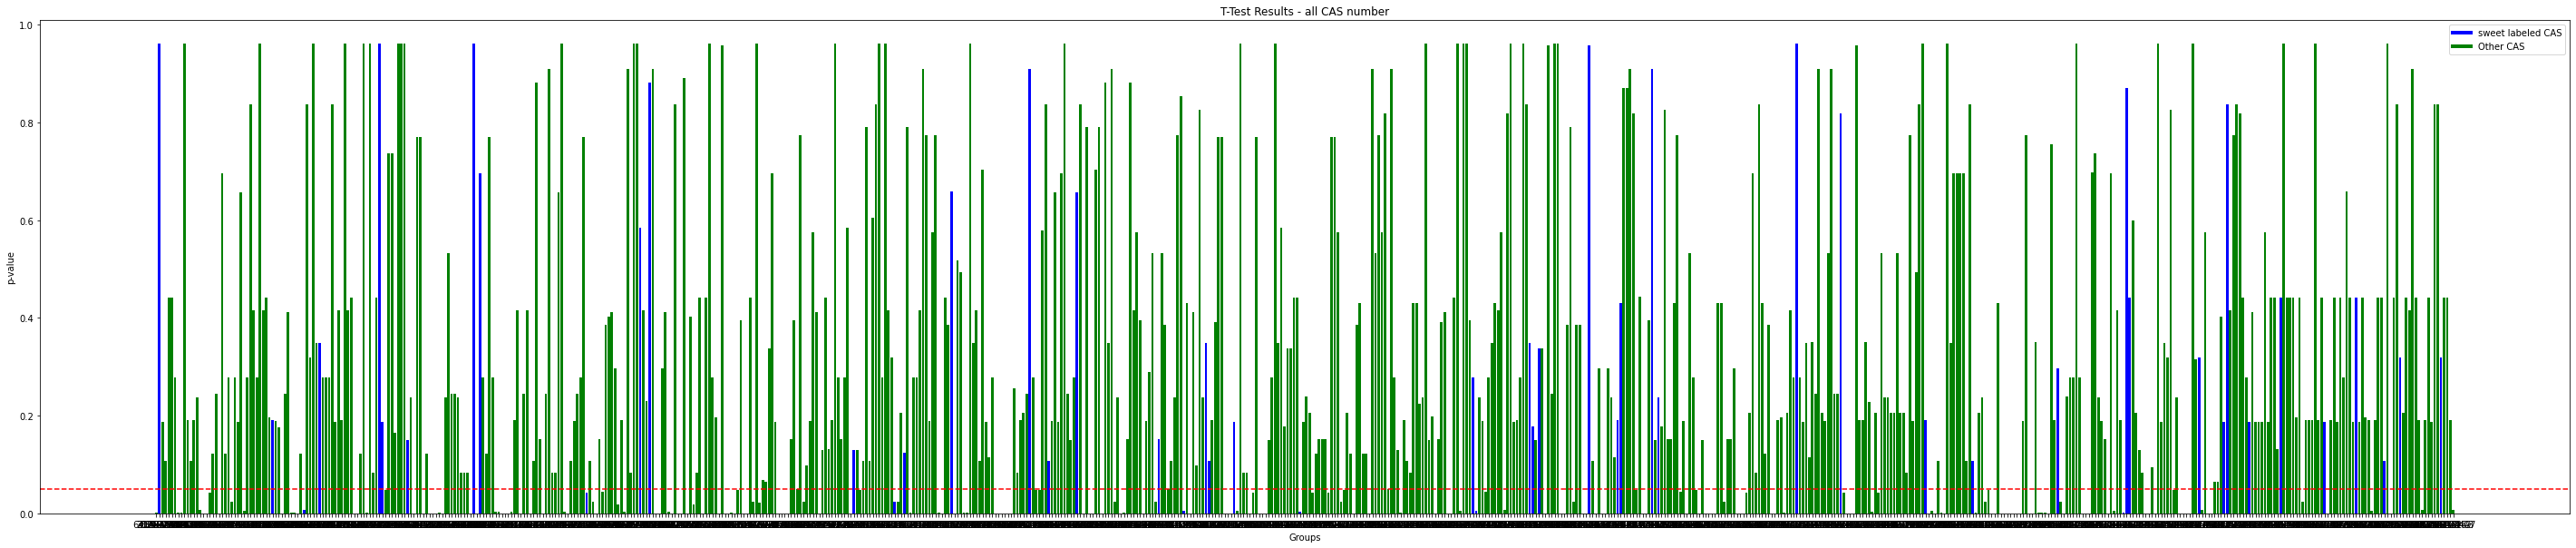

In [ ]:
# bar chart of p values
plt.figure(figsize=(50, 10))           
colors = ['b' if x in sweet_descriptors_CAS else 'g' for x in label_all]
plt.bar(label_all_gpt, p_val_all_gpt, color=colors)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('Groups')
plt.ylabel('p-value')
plt.title('T-Test Results - all CAS number')
legend_entries = [Line2D([0], [0], color='b', lw=4, label='sweet labeled CAS'),
                  Line2D([0], [0], color='g', lw=4, label='Other CAS')]
plt.legend(handles=legend_entries)

plt.show()


### Predictive Models 
#### Linear Regression

In [298]:
from scipy.optimize import leastsq

def find_best_params(x, y):
    x=np.nan_to_num(x)
    def score( p, x,y):
        prediction = np.dot(x,p)
        #print(prediction)
        #print(np.sum(np.abs(prediction-y)))
        return np.hstack((prediction-y,p))
    
    p0=np.ones(np.shape(x)[1])
    p1 = leastsq(score, p0,(x,y),epsfcn=1)[0]
    
    prediction = np.dot(p1,x.T)
    return(prediction)

In [278]:
sum(np.array((ms_data_comp.loc['000656']*2).fillna(0)))

1298.4562894416672

In [291]:
len(np.dot([2]*732,np.nan_to_num(ms_data_comp.T)))

197

In [261]:
ms_data_comp.T

sample_key,000656,000657,000658,000838,000839,000856,000860,000862,000874,000875,...,000912,000915,000917,000920,000922,000925,000926,000927,000929,000930
6485-40-1,1.199706,1.086004,1.113889,1.298360,1.621833,1.316098,1.497039,1.840384,1.023384,1.366748,...,1.068330,0.940548,0.928248,1.158771,0.916172,0.934255,1.195306,0.931354,0.912927,0.889222
3033-23-6,1.096160,1.259616,0.971559,0.862224,1.188670,1.131070,1.021141,1.111013,0.711476,0.989112,...,0.793657,0.635294,0.671239,0.895271,0.736523,0.796164,0.799962,0.735943,0.858373,0.690203
21284-22-0,0.885081,0.775672,1.142589,2.311178,2.170095,1.648621,2.147925,1.574745,1.733348,3.704980,...,1.050245,1.030895,1.260208,0.946861,0.973346,1.017651,1.124015,1.273055,0.789148,0.971010
38427-78-0,0.725355,0.689940,1.112428,1.935987,1.563707,1.390879,1.703843,1.226591,1.675922,1.851976,...,0.984155,1.088909,1.294178,0.819830,1.057127,1.176241,1.204234,1.348861,0.901522,1.054994
495-61-4,0.735938,0.670537,1.054808,1.840937,1.103434,1.266639,1.346991,0.848634,1.356748,1.171343,...,1.481590,1.807617,1.808300,1.523904,1.579881,1.594876,1.242241,1.487501,1.417848,2.452385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713-95-1,0.736188,0.672220,0.949219,0.997620,0.834108,0.955785,1.055708,0.896702,1.311870,0.895146,...,1.113325,1.512552,1.229802,1.012158,1.379843,1.294251,1.036239,1.180231,1.365638,1.428943
20307-84-0,0.735938,0.670537,1.054808,1.840937,1.103434,1.266639,1.346991,0.848634,1.356748,1.171343,...,1.481590,1.807617,1.808300,1.523904,1.579881,1.594876,1.242241,1.487501,1.417848,2.452385
120021-96-7,0.735938,0.670537,1.054808,1.840937,1.103434,1.266639,1.346991,0.848634,1.356748,1.171343,...,1.481590,1.807617,1.808300,1.523904,1.579881,1.594876,1.242241,1.487501,1.417848,2.452385
586-62-9,1.037468,0.871527,1.087983,1.469272,0.732118,0.756576,1.140798,0.919127,1.380755,0.868273,...,1.002595,0.983279,1.029537,1.192345,0.877381,0.888183,1.214896,1.002939,0.674334,1.192070


In [299]:
prediction_sweet= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Sweet']))
prediction_fruity= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Fruity']))
prediction_woody= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Woody']))
prediction_malt= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Malt']))
prediction_floral= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Floral']))
prediction_peaty= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Peaty']))
prediction_dried_fruits= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Dried_fruits']))
prediction_complexity= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Complexity']))
prediction_aftertaste= find_best_params(np.array( ms_data_comp ),np.array(panelist_data_comp['Aftertaste']))


In [300]:
def show_correlation_pred(prediction,y,flavor):
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    
    b= plt.hist(y,5)[1]
    plt.hist(prediction, bins=b,alpha=0.5)
    
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    
    plt.subplot(1,2,2)
    plt.plot(prediction,y,"o")
    
    plt.title("Correlation: "+ str(np.corrcoef(np.array(prediction), y)[0,1]))

   
    plt.suptitle(flavor)
    plt.show()

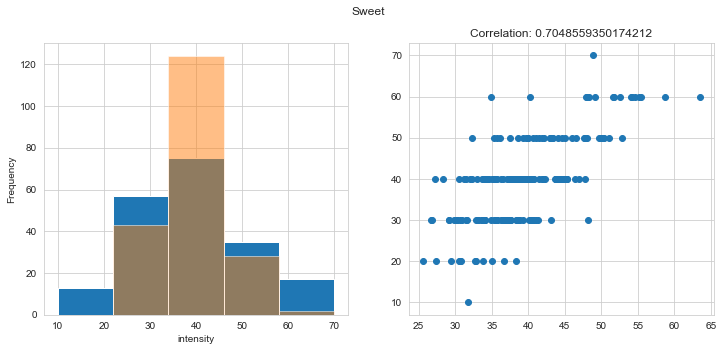

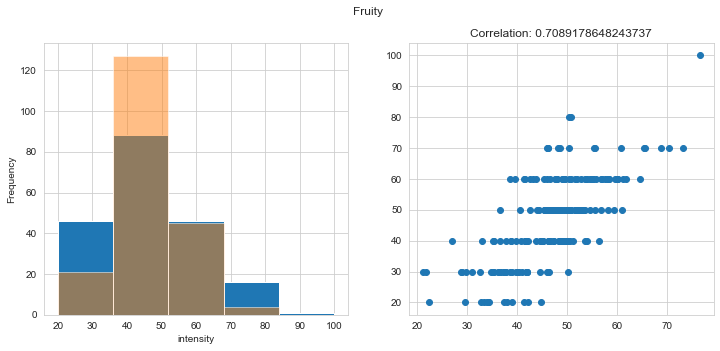

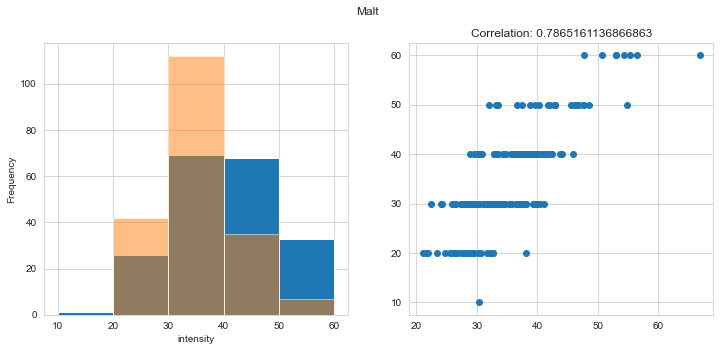

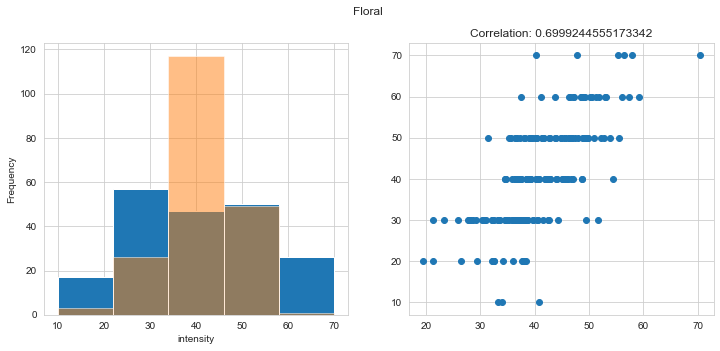

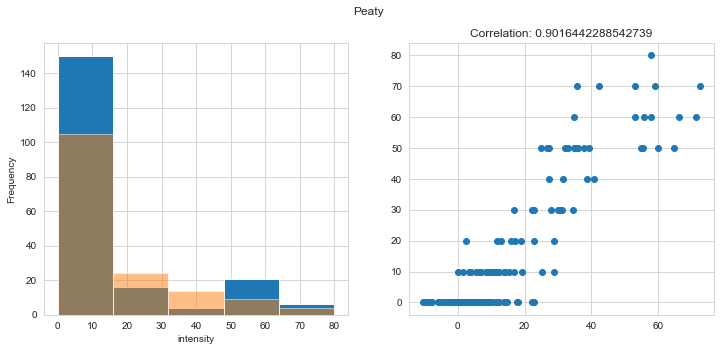

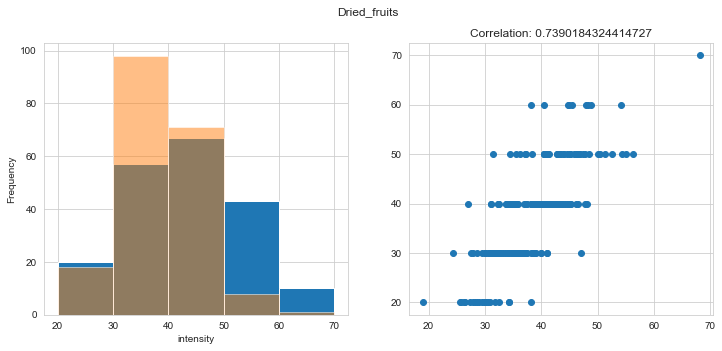

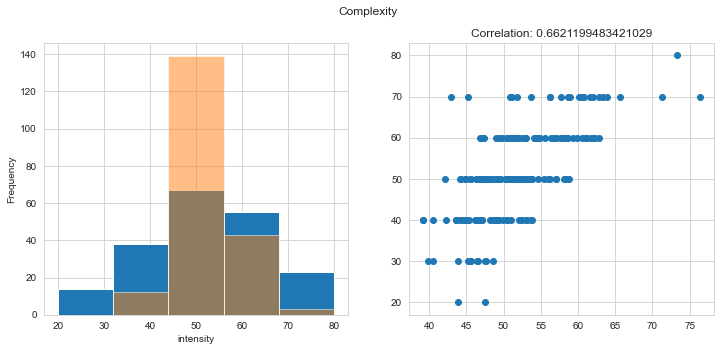

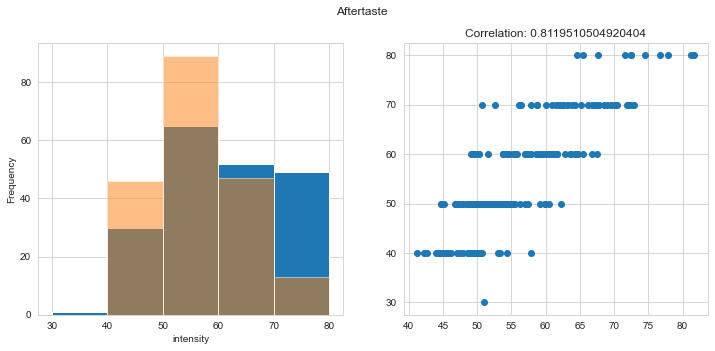

In [301]:
show_correlation_pred(prediction_sweet,np.array(panelist_data_comp['Sweet']),"Sweet")
show_correlation_pred(prediction_fruity,np.array(panelist_data_comp['Fruity']),"Fruity")
show_correlation_pred(prediction_malt,np.array(panelist_data_comp['Malt']),"Malt")
show_correlation_pred(prediction_floral,np.array(panelist_data_comp['Floral']),"Floral")
show_correlation_pred(prediction_peaty,np.array(panelist_data_comp['Peaty']),"Peaty")
show_correlation_pred(prediction_dried_fruits,np.array(panelist_data_comp['Dried_fruits']),"Dried_fruits")
show_correlation_pred(prediction_complexity,np.array(panelist_data_comp['Complexity']),"Complexity")
show_correlation_pred(prediction_aftertaste,np.array(panelist_data_comp['Aftertaste']),"Aftertaste")

looking at flavornet flavors only (Sweet, malt,fruity,woody)

In [176]:
prediction_sweet_fn = find_best_params(np.array( sweet_cas_violin_df.iloc[:,:-4] ),np.array(panelist_data_comp['Sweet']))
prediction_fruity_fn = find_best_params(np.array( fruity_cas_violin_df.iloc[:,:-4] ),np.array(panelist_data_comp['Fruity']))
prediction_woody_fn = find_best_params(np.array( woody_cas_violin_df.iloc[:,:-4] ),np.array(panelist_data_comp['Woody']))


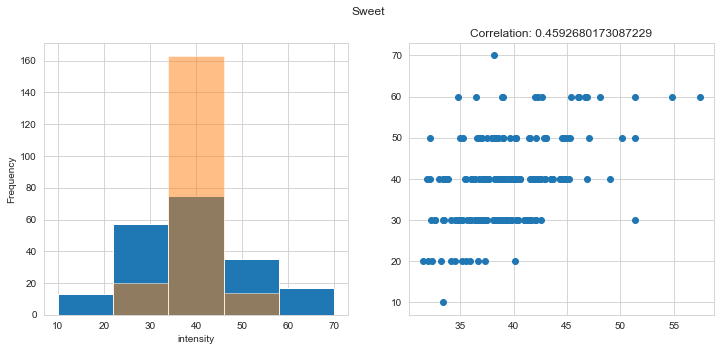

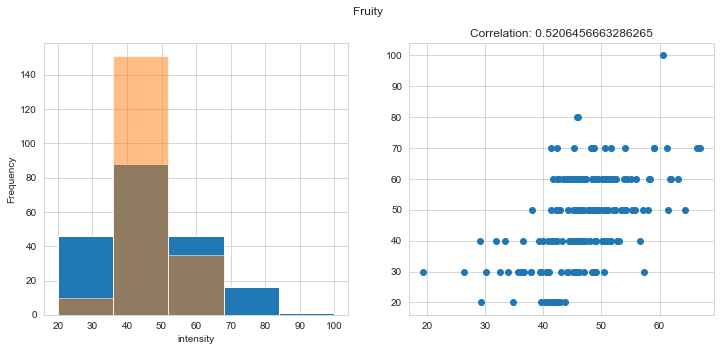

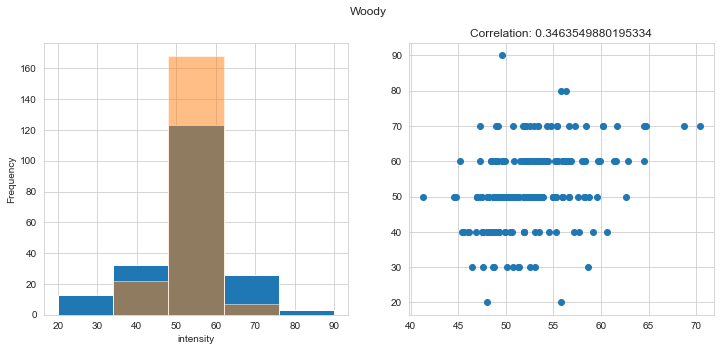

In [177]:
show_correlation_pred(prediction_sweet_fn,np.array(panelist_data_comp['Sweet']),"Sweet")
show_correlation_pred(prediction_fruity_fn,np.array(panelist_data_comp['Fruity']),"Fruity")
show_correlation_pred(prediction_woody_fn,np.array(panelist_data_comp['Woody']),"Woody")
